In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Accéder google drive
try:
    from google.colab import drive
    drive.mount('/content/drive')
except:
    pass

Mounted at /content/drive


# Load Data

In [2]:
path = os.getcwd()+'/drive/MyDrive/Fiscal_Policy_Project/'

In [4]:
france_st_q = pd.read_csv(path+'Data/Intermediate_Data/france_st_q.csv')
germany_st_q = pd.read_csv(path+'/Data/Intermediate_Data/germany_st_q.csv')

FileNotFoundError: ignored

In [ ]:
df_macro_fr = pd.read_csv(path+'Data/Macro/Macro_FR_2007-22.csv', sep=';', decimal=',')
df_macro_de = pd.read_csv(path+'Data/Macro/Macro_DE_2007-22.csv', decimal=',')

# Preprocessing

In [ ]:
df_macro_de['TARGET-2'] = df_macro_de['TARGET-2'].fillna(0)
df_macro_fr['TARGET-2'] = df_macro_fr['TARGET-2'].fillna(0)

target_rol_de = df_macro_de['TARGET-2'].rolling(min_periods=1, center=True, window=12).mean()
df_macro_de['TARGET-2'] = df_macro_de['TARGET-2'].where(df_macro_de['TARGET-2'] != 0, target_rol_de)

target_rol_fr = df_macro_fr['TARGET-2'].rolling(min_periods=1, center=True, window=8).mean()
df_macro_fr['TARGET-2'] = df_macro_fr['TARGET-2'].where(df_macro_fr['TARGET-2'] != 0, target_rol_fr)

In [ ]:
df_macro_fr = df_macro_fr.rename(columns={'TAUX_DE_CHÔMAGE': 'TdC',
                                          'CURRENT_ACCOUNT': 'CA',
                                          'FINANCIAL_ACCOUNT': 'FA'})
france_st_q = france_st_q.rename(columns={'Sentence_Encoder_Matched_Score': 'SIMILARITY'})

df_macro_de = df_macro_de.rename(columns={'TAUX_DE_CHÔMAGE': 'TdC',
                                          'CURRENT_ACCOUNT': 'CA',
                                          'FINANCIAL_ACCCOUNT': 'FA'})
germany_st_q = germany_st_q.rename(columns={'Sentence_Encoder_Matched_Score': 'SIMILARITY'})

In [ ]:
# Preprocessing données macro
df_macro_fr_num = df_macro_fr.iloc[:,1:].apply(pd.to_numeric, errors='coerce')
df_macro_de_num = df_macro_de.iloc[:,1:].apply(pd.to_numeric, errors='coerce')

# Overview

In [ ]:
target_f = france_st_q['SIMILARITY']
frames_f = [df_macro_fr_num, target_f]
df_f = pd.concat(frames_f, axis=1, join='inner')
df_f.index = pd.DatetimeIndex(df_macro_fr['TIME'].iloc[2:])

In [ ]:
target_g = germany_st_q['SIMILARITY']
frames_g = [df_macro_de_num, target_g]
df_g = pd.concat(frames_g, axis=1)
df_g.index = pd.DatetimeIndex(df_macro_fr['TIME'])

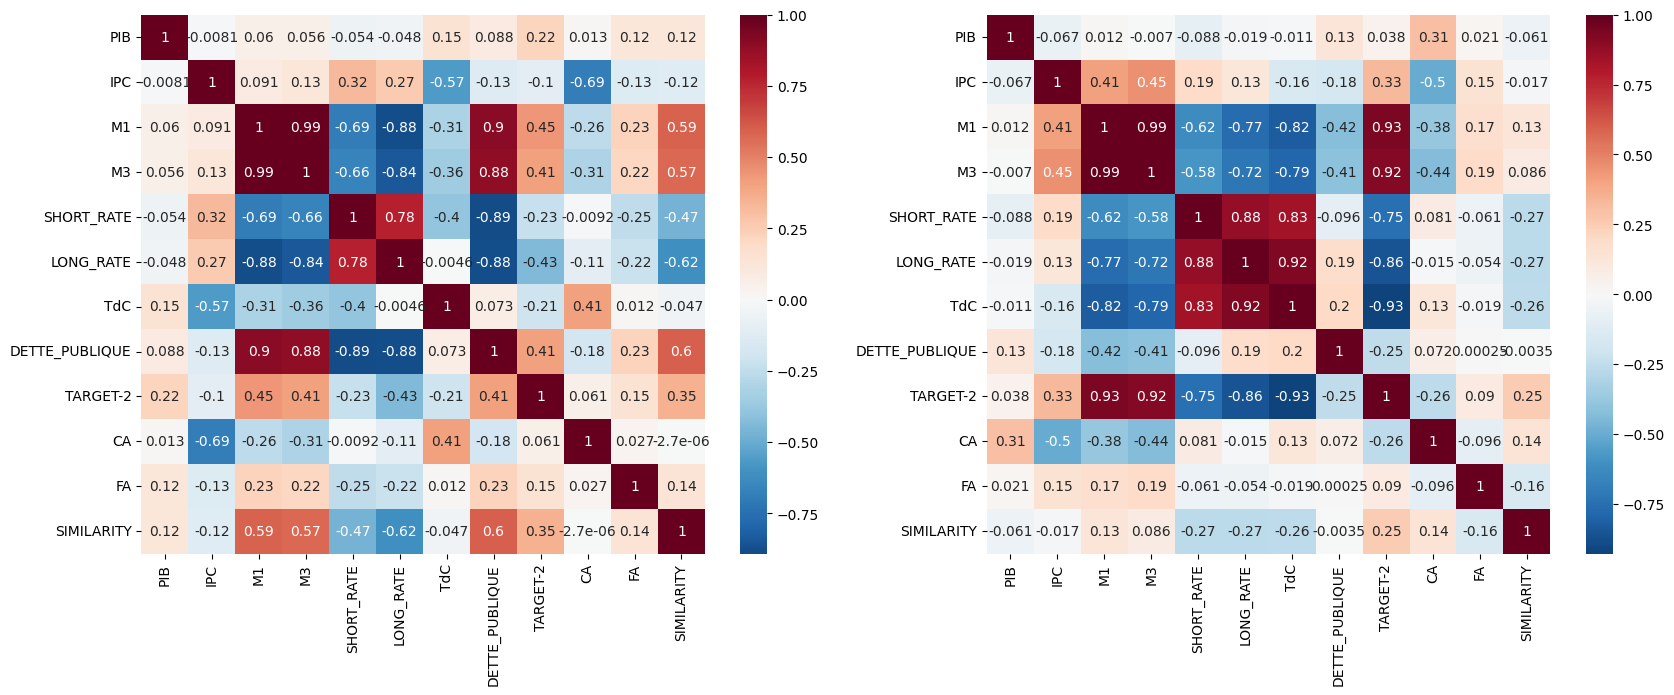

In [ ]:
fig = plt.figure(figsize=(20, 7))

plt.subplot(121)
sns.heatmap(df_f.corr(method='pearson'), annot=True, cmap="RdBu_r", center=0);

plt.subplot(122)
sns.heatmap(df_g.corr(method='pearson'), annot=True, cmap="RdBu_r", center=0);

## Select Best Variables

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
sk = SelectKBest(f_regression, k=5)
sk.fit(X=df_f, y=target_f)

df_f.columns[sk.get_support()]

Index(['M1', 'M3', 'LONG_RATE', 'DETTE_PUBLIQUE', 'SIMILARITY'], dtype='object')

In [ ]:
sk = SelectKBest(f_regression, k=4)
sk.fit(X=df_g, y=target_g)

df_g.columns[sk.get_support()]

Index(['SHORT_RATE', 'LONG_RATE', 'TdC', 'TARGET-2'], dtype='object')

In [ ]:
best_f = df_f[['M3', 'SHORT_RATE', 'LONG_RATE', 'DETTE_PUBLIQUE']]
best_f_all = df_f[['M3', 'SHORT_RATE', 'LONG_RATE', 'DETTE_PUBLIQUE', 'SIMILARITY']]

In [ ]:
best_g = df_g[['SHORT_RATE', 'LONG_RATE', 'FA', 'TARGET-2']]
best_g_all = df_g[['TARGET-2', 'SHORT_RATE', 'LONG_RATE', 'TdC', 'SIMILARITY']]

## Plot time trends

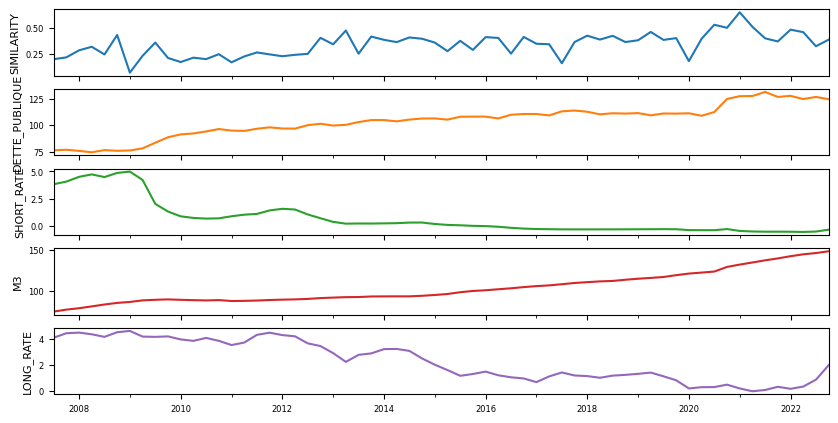

In [ ]:
fig,ax = plt.subplots(5, figsize=(10,5), sharex=True)
plot_cols = ['SIMILARITY', 'DETTE_PUBLIQUE', 'SHORT_RATE', 'M3', 'LONG_RATE']
best_f_all[plot_cols].plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)):
    ax[a].set_ylabel(plot_cols[a], fontsize=8)
    ax[a].tick_params(axis='both', which='major', labelsize=6)
ax[-1].set_xlabel('')
plt.show();

In [ ]:
best_f_all['SIMILARITY_TREND'] = best_f_all['SIMILARITY'].rolling(min_periods=1, center=True, window=8).mean()
best_f_all['SIMILARITY_TREND'] = best_f_all['SIMILARITY'].rolling(min_periods=1, center=True, window=8).mean()

<ipython-input-48-06aeb6b0cb2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_f_all['SIMILARITY_TREND'] = best_f_all['SIMILARITY'].rolling(min_periods=1, center=True, window=8).mean()
<ipython-input-48-06aeb6b0cb2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_f_all['SIMILARITY_TREND'] = best_f_all['SIMILARITY'].rolling(min_periods=1, center=True, window=8).mean()


<ipython-input-49-cef5d88044e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_best_fit[['LONG_RATE',


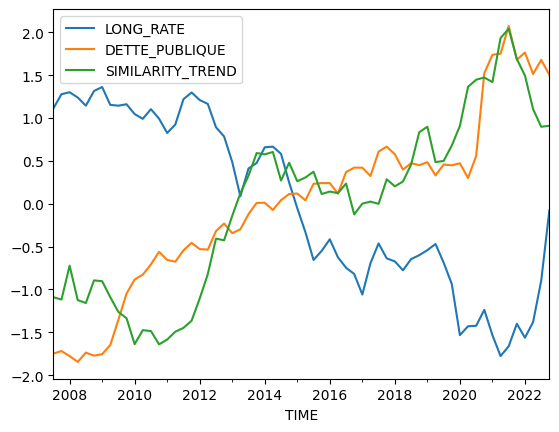

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

plot_best_fit = best_f_all[['LONG_RATE', 'DETTE_PUBLIQUE', 'SIMILARITY_TREND']]
plot_best_fit[['LONG_RATE',
               'DETTE_PUBLIQUE',
               'SIMILARITY_TREND']] = pt.fit_transform(best_f_all[['LONG_RATE',
                                                                'DETTE_PUBLIQUE',
                                                                'SIMILARITY_TREND']])

plot_best_fit.plot();

In [ ]:
best_g_all['SIMILARITY_TREND'] = best_g_all['SIMILARITY'].rolling(min_periods=1, center=True, window=16).mean()
best_g_all['SIMILARITY_TREND'] = best_g_all['SIMILARITY'].rolling(min_periods=1, center=True, window=16).mean()

<ipython-input-50-3d32b868f771>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_g_all['SIMILARITY_TREND'] = best_g_all['SIMILARITY'].rolling(min_periods=1, center=True, window=16).mean()
<ipython-input-50-3d32b868f771>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_g_all['SIMILARITY_TREND'] = best_g_all['SIMILARITY'].rolling(min_periods=1, center=True, window=16).mean()


<ipython-input-51-242c299e88e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_best_fit_g[['LONG_RATE',


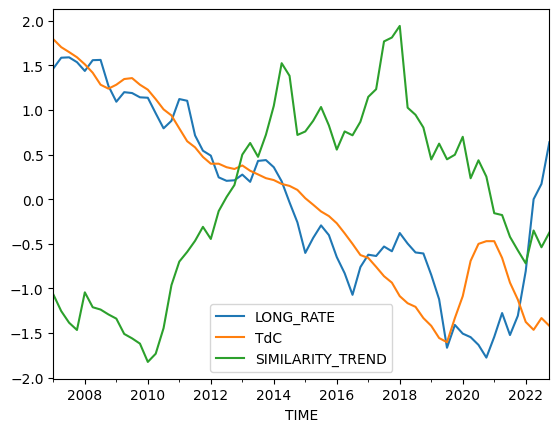

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

plot_best_fit_g = best_g_all[['LONG_RATE', 'TdC', 'SIMILARITY_TREND']]
plot_best_fit_g[['LONG_RATE',
               'TdC',
               'SIMILARITY_TREND']] = pt.fit_transform(best_g_all[['LONG_RATE',
                                                                'TdC',
                                                                'SIMILARITY_TREND']])

plot_best_fit_g.plot();

In [ ]:
best_f_all = best_f_all.drop('SIMILARITY_TREND', axis=1)
best_g_all = best_g_all.drop('SIMILARITY_TREND', axis=1)

# Stationarity

## ADF

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

### France

In [ ]:
# ADF Test on each column France
for name, column in best_f_all.items():
    adfuller_test(column, name=column.name)
    print()

    Augmented Dickey-Fuller Test on "M3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 3.9873
 No. Lags Chosen       = 7
 Critical value 1%     = -3.558
 Critical value 5%     = -2.917
 Critical value 10%    = -2.596
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.

    Augmented Dickey-Fuller Test on "SHORT_RATE" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.8503
 No. Lags Chosen       = 10
 Critical value 1%     = -3.566
 Critical value 5%     = -2.92
 Critical value 10%    = -2.598
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.

    Augmented Dickey-Fuller Test on "LONG_RATE" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 S

### Germany

In [ ]:
# ADF Test on each column Germany
for name, column in best_g_all.items():
    adfuller_test(column, name=column.name)
    print()

    Augmented Dickey-Fuller Test on "TARGET-2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.6122
 No. Lags Chosen       = 1
 Critical value 1%     = -3.541
 Critical value 5%     = -2.909
 Critical value 10%    = -2.592
 => P-Value = 0.8682. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.

    Augmented Dickey-Fuller Test on "SHORT_RATE" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.7708
 No. Lags Chosen       = 2
 Critical value 1%     = -3.542
 Critical value 5%     = -2.91
 Critical value 10%    = -2.593
 => P-Value = 0.0626. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.

    Augmented Dickey-Fuller Test on "LONG_RATE" 
    -----------------------------------------------
 Null Hypothesis: Data

## KPSS Test

### France

In [ ]:
from statsmodels.tsa.stattools import kpss
def kpss_test(x, h0_type='c'):
    indices = ['Test Statistic', 'p-value', '# of Lags']
    kpss_test = kpss(x, regression=h0_type, nlags ='auto')
    results = pd.Series(kpss_test[0:3], index=indices)
    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value
        return results
print('KPSS-M3:')
print(kpss_test(best_f_all.M3))
print('___________________')
print('KPSS-SHORT_RATE')
print(kpss_test(best_f_all.SHORT_RATE))
print('___________________')
print('KPSS-LONG_RATE:')
print(kpss_test(best_f_all.LONG_RATE))
print('___________________')
print('KPSS-DETTE_PUBLIQUE:')
print(kpss_test(best_f_all.DETTE_PUBLIQUE))
print('___________________')
print('KPSS-SIMILARITY:')
print(kpss_test(best_f_all.SIMILARITY))

KPSS-M3:
Test Statistic          1.243489
p-value                 0.010000
# of Lags               4.000000
Critical Value (10%)    0.347000
dtype: float64
___________________
KPSS-SHORT_RATE
Test Statistic          0.955443
p-value                 0.010000
# of Lags               4.000000
Critical Value (10%)    0.347000
dtype: float64
___________________
KPSS-LONG_RATE:
Test Statistic          1.045313
p-value                 0.010000
# of Lags               5.000000
Critical Value (10%)    0.347000
dtype: float64
___________________
KPSS-DETTE_PUBLIQUE:
Test Statistic          1.036733
p-value                 0.010000
# of Lags               5.000000
Critical Value (10%)    0.347000
dtype: float64
___________________
KPSS-SIMILARITY:
Test Statistic          0.958383
p-value                 0.010000
# of Lags               4.000000
Critical Value (10%)    0.347000
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the 

All the test statistics are greater than the critical value. So we have to reject the null hypothesis. All our series are non-stationary.

### Germany

In [ ]:
from statsmodels.tsa.stattools import kpss
def kpss_test(x, h0_type='c'):
    indices = ['Test Statistic', 'p-value', '# of Lags']
    kpss_test = kpss(x, regression=h0_type, nlags ='auto')
    results = pd.Series(kpss_test[0:3], index=indices)
    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value
        return results
print('KPSS-SHORT_RATE:')
print(kpss_test(best_g_all.SHORT_RATE))
print('___________________')
print('KPSS-LONG_RATE')
print(kpss_test(best_g_all.LONG_RATE))
print('___________________')
print('KPSS-TdC:')
print(kpss_test(best_g_all.TdC))
print('___________________')
print('KPSS-TARGET-2:')
print(kpss_test(best_g_all['TARGET-2']))
print('___________________')
print('KPSS-SIMILARITY:')
print(kpss_test(best_f_all.SIMILARITY))

KPSS-SHORT_RATE:
Test Statistic          0.785526
p-value                 0.010000
# of Lags               5.000000
Critical Value (10%)    0.347000
dtype: float64
___________________
KPSS-LONG_RATE
Test Statistic          0.993848
p-value                 0.010000
# of Lags               5.000000
Critical Value (10%)    0.347000
dtype: float64
___________________
KPSS-TdC:
Test Statistic          1.08204
p-value                 0.01000
# of Lags               5.00000
Critical Value (10%)    0.34700
dtype: float64
___________________
KPSS-TARGET-2:
Test Statistic          1.114658
p-value                 0.010000
# of Lags               5.000000
Critical Value (10%)    0.347000
dtype: float64
___________________
KPSS-SIMILARITY:
Test Statistic          0.958383
p-value                 0.010000
# of Lags               4.000000
Critical Value (10%)    0.347000
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the 

# Detrending

## Differencing

### France

In [ ]:
df_diff = pd.DataFrame()
df_diff['diffM3']=best_f_all['M3'].diff()
df_diff['M3']=df_diff['diffM3'].diff()
df_diff['LONG_RATE']=best_f_all['LONG_RATE'].diff()
df_diff['diffDP']=best_f_all['DETTE_PUBLIQUE'].diff()
df_diff['DETTE_PUBLIQUE']=df_diff['diffDP'].diff()
df_diff['SIMILARITY']=best_f_all['SIMILARITY']
df_diff['SHORT_RATE']=best_f_all['SHORT_RATE']
df_diff = df_diff.dropna()

In [ ]:
for name, column in df_diff.items():
    adfuller_test(column, name=column.name)
    print()

    Augmented Dickey-Fuller Test on "diffM3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.5302
 No. Lags Chosen       = 3
 Critical value 1%     = -3.553
 Critical value 5%     = -2.915
 Critical value 10%    = -2.595
 => P-Value = 0.5185. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.

    Augmented Dickey-Fuller Test on "M3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.6558
 No. Lags Chosen       = 2
 Critical value 1%     = -3.551
 Critical value 5%     = -2.914
 Critical value 10%    = -2.595
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.

    Augmented Dickey-Fuller Test on "LONG_RATE" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 S

In [ ]:
df_diff_new = df_diff[['SIMILARITY', 'M3', 'SHORT_RATE','DETTE_PUBLIQUE','LONG_RATE']]
df_diff_new.index = df_diff_new.index.to_period('Q')

Great, our data for France is stationary!

### Germany

In [ ]:
df_diff_g = pd.DataFrame()
df_diff_g['TARGET-2']=best_g_all['TARGET-2'].diff()
df_diff_g['LONG_RATE']=best_g_all['LONG_RATE'].diff()
df_diff_g['TdC']=best_g_all['TdC'].diff()
df_diff_g['SHORT_RATE']=best_g_all['SHORT_RATE'].diff()
df_diff_g['SIMILARITY']=best_g_all['SIMILARITY']
df_diff_g = df_diff_g.dropna()

In [ ]:
for name, column in df_diff_g.items():
    adfuller_test(column, name=column.name)
    print()

    Augmented Dickey-Fuller Test on "TARGET-2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.0981
 No. Lags Chosen       = 0
 Critical value 1%     = -3.541
 Critical value 5%     = -2.909
 Critical value 10%    = -2.592
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.

    Augmented Dickey-Fuller Test on "LONG_RATE" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.0347
 No. Lags Chosen       = 0
 Critical value 1%     = -3.541
 Critical value 5%     = -2.909
 Critical value 10%    = -2.592
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.

    Augmented Dickey-Fuller Test on "TdC" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    =

In [ ]:
df_diff_g_new = df_diff_g[['TARGET-2', 'SHORT_RATE', 'LONG_RATE', 'TdC', 'SIMILARITY']]
df_diff_g_new.index = df_diff_g_new.index.to_period('Q')

Great, our data for Germany is stationary!

# Normal Distribution

### France

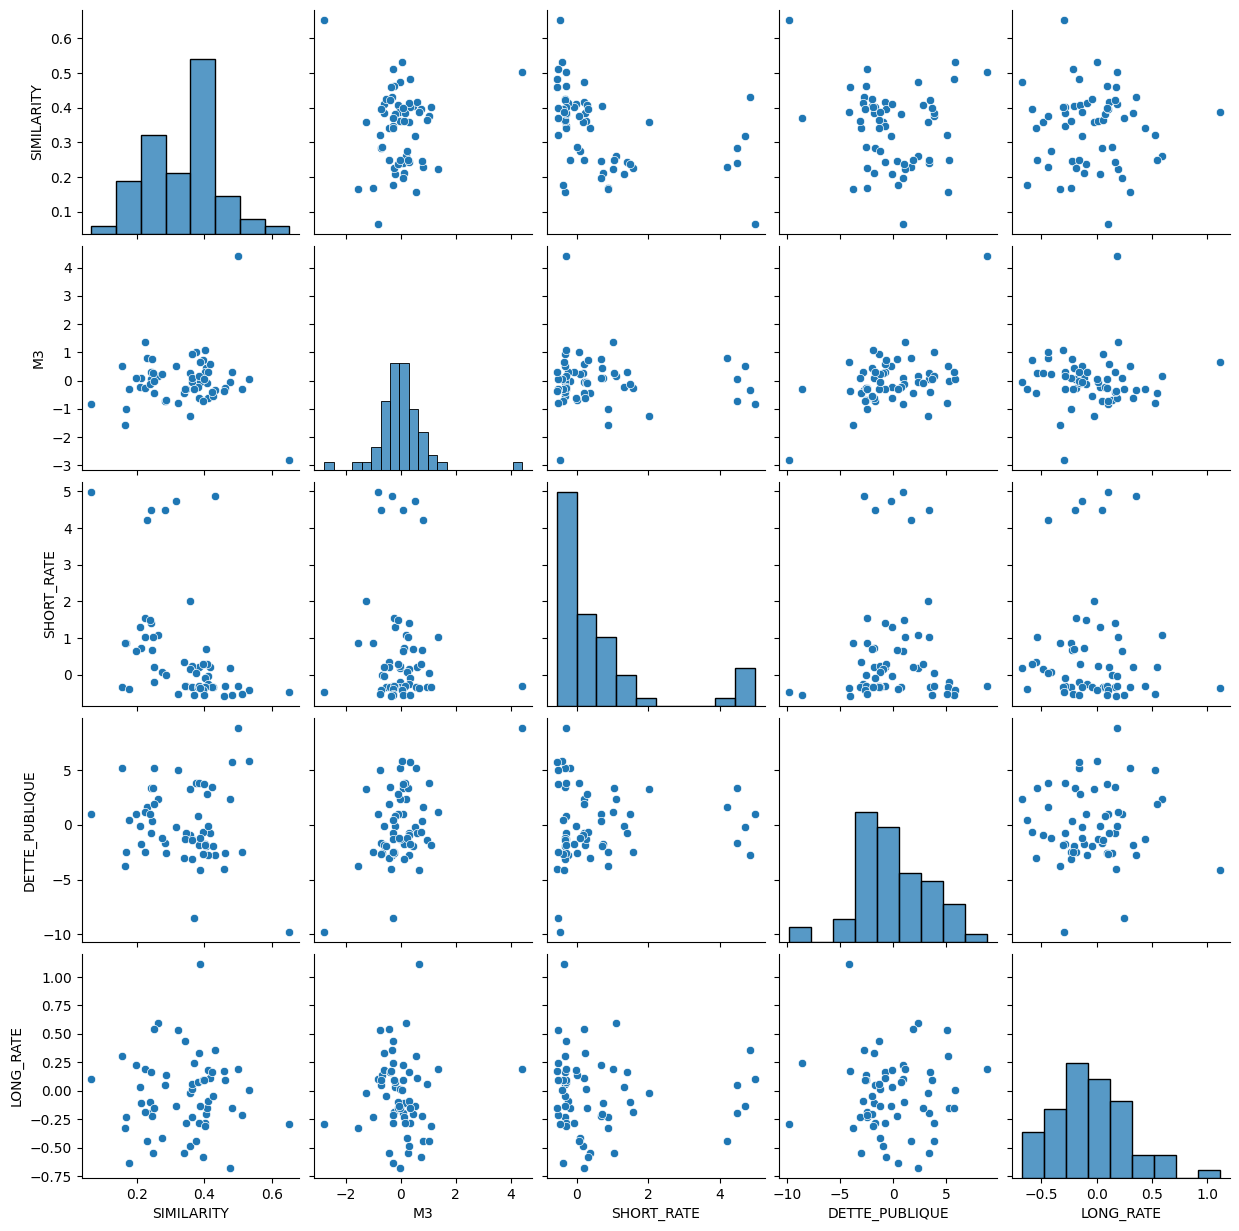

In [ ]:
sns.pairplot(df_diff_new)

In [ ]:
from scipy import stats

stat,p = stats.normaltest(df_diff_new.M3)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('M3 Data does looks Gaussian (fail to reject H0)')
else:
    print('M3 Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(df_diff_new.SHORT_RATE)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('SHORT_RATE Data looks Gaussian (fail to reject H0)')
else:
    print('SHORT_RATE Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(df_diff_new.LONG_RATE)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('LONG_RATE Data looks Gaussian (fail to reject H0)')
else:
    print('LONG_RATE Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(df_diff_new.DETTE_PUBLIQUE)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('DETTE_PUBLIQUE Data looks Gaussian (fail to reject H0)')
else:
    print('DETTE_PUBLIQUE Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(df_diff_new.SIMILARITY)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('SIMILARITY Data looks Gaussian (fail to reject H0)')
else:
    print('SIMILARITY Data does not look Gaussian (reject H0)')
print('______________')
print('M3: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df_diff_new.M3)))
print('M3: Skewness of normal distribution: {}'. format(stats.skew(df_diff_new.M3)))
print('************')
print('SHORT_RATE: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df_diff_new.SHORT_RATE)))
print('SHORT_RATE: Skewness of normal distribution: {}'. format(stats.skew(df_diff_new.SHORT_RATE)))
print('************')
print('LONG_RATE: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df_diff_new.LONG_RATE)))
print('LONG_RATE: Skewness of normal distribution: {}'. format(stats.skew(df_diff_new.LONG_RATE)))
print('************')
print('DETTE_PUBLIQUE: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df_diff_new.DETTE_PUBLIQUE)))
print('DETTE_PUBLIQUE: Skewness of normal distribution: {}'. format(stats.skew(df_diff_new.DETTE_PUBLIQUE)))
print('************')
print('SIMILARITY: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df_diff_new.SIMILARITY)))
print('SIMILARITY: Skewness of normal distribution: {}'. format(stats.skew(df_diff_new.SIMILARITY)))

Statistics=39.828, p=0.000
M3 Data does not look Gaussian (reject H0)
______________
Statistics=32.212, p=0.000
SHORT_RATE Data does not look Gaussian (reject H0)
______________
Statistics=7.289, p=0.026
LONG_RATE Data does not look Gaussian (reject H0)
______________
Statistics=1.980, p=0.372
DETTE_PUBLIQUE Data looks Gaussian (fail to reject H0)
______________
Statistics=0.256, p=0.880
SIMILARITY Data looks Gaussian (fail to reject H0)
______________
M3: Kurtosis of normal distribution: 9.718820570728129
M3: Skewness of normal distribution: 1.515294311154972
************
SHORT_RATE: Kurtosis of normal distribution: 2.7540340620907795
SHORT_RATE: Skewness of normal distribution: 1.9420823679748185
************
LONG_RATE: Kurtosis of normal distribution: 1.1375421325123565
LONG_RATE: Skewness of normal distribution: 0.6046516094174429
************
DETTE_PUBLIQUE: Kurtosis of normal distribution: 0.7197394374983821
DETTE_PUBLIQUE: Skewness of normal distribution: -0.011128481514926887
*

In [ ]:
# Transform data for normal distribution
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_norm_pt  = pt.fit_transform(df_diff_new[['M3', 'LONG_RATE', 'SHORT_RATE']])
df_norm = pd.DataFrame(df_norm_pt, columns=['M3', 'LONG_RATE', 'SHORT_RATE'])
df_norm.index = df_diff_new.index
new_df_norm = pd.concat([df_diff_new[['SIMILARITY','DETTE_PUBLIQUE']], df_norm], axis=1)

In [ ]:
from scipy import stats

stat,p = stats.normaltest(new_df_norm.M3)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('M3 Data does looks Gaussian (fail to reject H0)')
else:
    print('M3 Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(new_df_norm.SHORT_RATE)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('SHORT_RATE Data looks Gaussian (fail to reject H0)')
else:
    print('SHORT_RATE Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(new_df_norm.LONG_RATE)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('LONG_RATE Data looks Gaussian (fail to reject H0)')
else:
    print('LONG_RATE Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(new_df_norm.DETTE_PUBLIQUE)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('DETTE_PUBLIQUE Data looks Gaussian (fail to reject H0)')
else:
    print('DETTE_PUBLIQUE Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(new_df_norm.SIMILARITY)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('SIMILARITY Data looks Gaussian (fail to reject H0)')
else:
    print('SIMILARITY Data does not look Gaussian (reject H0)')
print('______________')
print('M3: Kurtosis of normal distribution: {}'. format(stats.kurtosis(new_df_norm.M3)))
print('M3: Skewness of normal distribution: {}'. format(stats.skew(new_df_norm.M3)))
print('************')
print('SHORT_RATE: Kurtosis of normal distribution: {}'. format(stats.kurtosis(new_df_norm.SHORT_RATE)))
print('SHORT_RATE: Skewness of normal distribution: {}'. format(stats.skew(new_df_norm.SHORT_RATE)))
print('************')
print('LONG_RATE: Kurtosis of normal distribution: {}'. format(stats.kurtosis(new_df_norm.LONG_RATE)))
print('LONG_RATE: Skewness of normal distribution: {}'. format(stats.skew(new_df_norm.LONG_RATE)))
print('************')
print('DETTE_PUBLIQUE: Kurtosis of normal distribution: {}'. format(stats.kurtosis(new_df_norm.DETTE_PUBLIQUE)))
print('DETTE_PUBLIQUE: Skewness of normal distribution: {}'. format(stats.skew(new_df_norm.DETTE_PUBLIQUE)))
print('************')
print('SIMILARITY: Kurtosis of normal distribution: {}'. format(stats.kurtosis(new_df_norm.SIMILARITY)))
print('SIMILARITY: Skewness of normal distribution: {}'. format(stats.skew(new_df_norm.SIMILARITY)))

Statistics=17.768, p=0.000
M3 Data does not look Gaussian (reject H0)
______________
Statistics=10.195, p=0.006
SHORT_RATE Data does not look Gaussian (reject H0)
______________
Statistics=0.318, p=0.853
LONG_RATE Data looks Gaussian (fail to reject H0)
______________
Statistics=1.980, p=0.372
DETTE_PUBLIQUE Data looks Gaussian (fail to reject H0)
______________
Statistics=0.256, p=0.880
SIMILARITY Data looks Gaussian (fail to reject H0)
______________
M3: Kurtosis of normal distribution: 6.480215867771076
M3: Skewness of normal distribution: -0.16663232523484164
************
SHORT_RATE: Kurtosis of normal distribution: -1.0785438613413683
SHORT_RATE: Skewness of normal distribution: 0.24323930275692413
************
LONG_RATE: Kurtosis of normal distribution: 0.09836938809103479
LONG_RATE: Skewness of normal distribution: 0.014372279982364126
************
DETTE_PUBLIQUE: Kurtosis of normal distribution: 0.7197394374983821
DETTE_PUBLIQUE: Skewness of normal distribution: -0.011128481514

### Germany

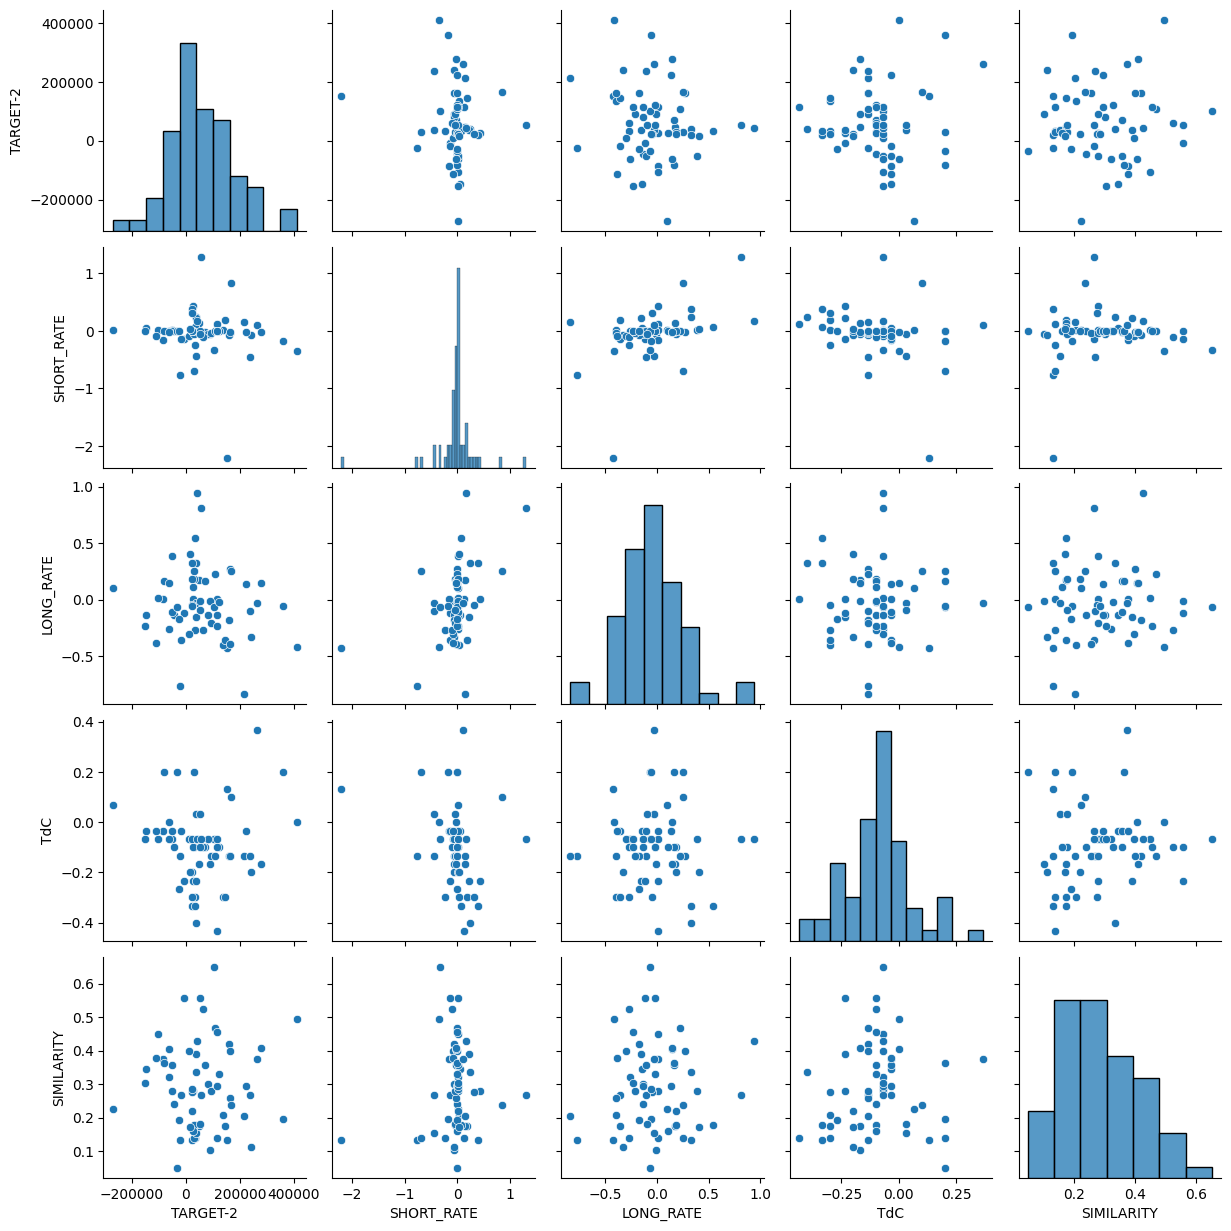

In [ ]:
sns.pairplot(df_diff_g_new)

In [ ]:
from scipy import stats

stat,p = stats.normaltest(df_diff_g_new['TARGET-2'])
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('TARGET-2 Data looks Gaussian (fail to reject H0)')
else:
    print('TARGET-2 Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(df_diff_g_new.SHORT_RATE)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('SHORT_RATE Data looks Gaussian (fail to reject H0)')
else:
    print('SHORT_RATE Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(df_diff_g_new.LONG_RATE)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('LONG_RATE Data looks Gaussian (fail to reject H0)')
else:
    print('LONG_RATE Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(df_diff_g_new.TdC)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('TdC Data looks Gaussian (fail to reject H0)')
else:
    print('TdC Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(df_diff_g_new.SIMILARITY)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('SIMILARITY Data looks Gaussian (fail to reject H0)')
else:
    print('SIMILARITY Data does not look Gaussian (reject H0)')
print('______________')
print('M3: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df_diff_g_new['TARGET-2'])))
print('M3: Skewness of normal distribution: {}'. format(stats.skew(df_diff_g_new['TARGET-2'])))
print('************')
print('SHORT_RATE: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df_diff_g_new.SHORT_RATE)))
print('SHORT_RATE: Skewness of normal distribution: {}'. format(stats.skew(df_diff_g_new.SHORT_RATE)))
print('************')
print('LONG_RATE: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df_diff_g_new.LONG_RATE)))
print('LONG_RATE: Skewness of normal distribution: {}'. format(stats.skew(df_diff_g_new.LONG_RATE)))
print('************')
print('TdC: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df_diff_g_new.TdC)))
print('TdC: Skewness of normal distribution: {}'. format(stats.skew(df_diff_g_new.TdC)))
print('************')
print('SIMILARITY: Kurtosis of normal distribution: {}'. format(stats.kurtosis(df_diff_g_new.SIMILARITY)))
print('SIMILARITY: Skewness of normal distribution: {}'. format(stats.skew(df_diff_g_new.SIMILARITY)))

Statistics=3.812, p=0.149
TARGET-2 Data looks Gaussian (fail to reject H0)
______________
Statistics=54.985, p=0.000
SHORT_RATE Data does not look Gaussian (reject H0)
______________
Statistics=6.546, p=0.038
LONG_RATE Data does not look Gaussian (reject H0)
______________
Statistics=4.613, p=0.100
TdC Data looks Gaussian (fail to reject H0)
______________
Statistics=2.867, p=0.238
SIMILARITY Data looks Gaussian (fail to reject H0)
______________
M3: Kurtosis of normal distribution: 0.8454427650431136
M3: Skewness of normal distribution: 0.33856680091906566
************
SHORT_RATE: Kurtosis of normal distribution: 14.508932497763904
SHORT_RATE: Skewness of normal distribution: -2.0426075273050657
************
LONG_RATE: Kurtosis of normal distribution: 1.4783210212906637
LONG_RATE: Skewness of normal distribution: 0.40520616019626216
************
TdC: Kurtosis of normal distribution: 0.8542583725108899
TdC: Skewness of normal distribution: 0.426920766429248
************
SIMILARITY: Kur

In [ ]:
df_norm_pt_g = pt.fit_transform(df_diff_g_new[['TdC', 'LONG_RATE', 'SHORT_RATE']])
df_norm_g = pd.DataFrame(df_norm_pt_g, columns=['TdC', 'LONG_RATE', 'SHORT_RATE'])
df_norm_g.index = df_diff_g_new.index
new_df_norm_g = pd.concat([df_diff_g_new[['SIMILARITY','TARGET-2']], df_norm_g], axis=1)

In [ ]:
from scipy import stats

stat,p = stats.normaltest(new_df_norm_g['TARGET-2'])
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('TARGET-2 Data looks Gaussian (fail to reject H0)')
else:
    print('TARGET-2 Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(new_df_norm_g.SHORT_RATE)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('SHORT_RATE Data looks Gaussian (fail to reject H0)')
else:
    print('SHORT_RATE Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(new_df_norm_g.LONG_RATE)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('LONG_RATE Data looks Gaussian (fail to reject H0)')
else:
    print('LONG_RATE Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(new_df_norm_g.TdC)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('FA Data looks Gaussian (fail to reject H0)')
else:
    print('FA Data does not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(new_df_norm_g.SIMILARITY)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
    print('SIMILARITY Data looks Gaussian (fail to reject H0)')
else:
    print('SIMILARITY Data does not look Gaussian (reject H0)')
print('______________')
print('M3: Kurtosis of normal distribution: {}'. format(stats.kurtosis(new_df_norm_g['TARGET-2'])))
print('M3: Skewness of normal distribution: {}'. format(stats.skew(new_df_norm_g['TARGET-2'])))
print('************')
print('SHORT_RATE: Kurtosis of normal distribution: {}'. format(stats.kurtosis(new_df_norm_g.SHORT_RATE)))
print('SHORT_RATE: Skewness of normal distribution: {}'. format(stats.skew(new_df_norm_g.SHORT_RATE)))
print('************')
print('LONG_RATE: Kurtosis of normal distribution: {}'. format(stats.kurtosis(new_df_norm_g.LONG_RATE)))
print('LONG_RATE: Skewness of normal distribution: {}'. format(stats.skew(new_df_norm_g.LONG_RATE)))
print('************')
print('FA: Kurtosis of normal distribution: {}'. format(stats.kurtosis(new_df_norm_g.TdC)))
print('FA: Skewness of normal distribution: {}'. format(stats.skew(new_df_norm_g.TdC)))
print('************')
print('SIMILARITY: Kurtosis of normal distribution: {}'. format(stats.kurtosis(new_df_norm_g.SIMILARITY)))
print('SIMILARITY: Skewness of normal distribution: {}'. format(stats.skew(new_df_norm_g.SIMILARITY)))

Statistics=3.812, p=0.149
TARGET-2 Data looks Gaussian (fail to reject H0)
______________
Statistics=24.819, p=0.000
SHORT_RATE Data does not look Gaussian (reject H0)
______________
Statistics=4.021, p=0.134
LONG_RATE Data looks Gaussian (fail to reject H0)
______________
Statistics=1.323, p=0.516
FA Data looks Gaussian (fail to reject H0)
______________
Statistics=2.867, p=0.238
SIMILARITY Data looks Gaussian (fail to reject H0)
______________
M3: Kurtosis of normal distribution: 0.8454427650431136
M3: Skewness of normal distribution: 0.33856680091906566
************
SHORT_RATE: Kurtosis of normal distribution: 10.104363070123528
SHORT_RATE: Skewness of normal distribution: 0.2960037509644242
************
LONG_RATE: Kurtosis of normal distribution: 1.3020003183279076
LONG_RATE: Skewness of normal distribution: -0.0544261525688955
************
FA: Kurtosis of normal distribution: 0.49291622208812846
FA: Skewness of normal distribution: -0.04064563405787237
************
SIMILARITY: Kur

# Cointegration

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05):
    '''
    Test if there is a long-run relationship between features

    Args:
        dataframe (float64): Values of the columns to be checked, numpy array of floats

    Returns:
        True or False whether a variable has a long-run relationship between other features
    '''

    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


In [ ]:
cointegration_test(df_diff_new)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
SIMILARITY ::  102.47    > 60.0627   =>   True
M3     ::  50.73     > 40.1749   =>   True
SHORT_RATE ::  19.86     > 24.2761   =>   False
DETTE_PUBLIQUE ::  3.95      > 12.3212   =>   False
LONG_RATE ::  0.62      > 4.1296    =>   False


In [ ]:
cointegration_test(new_df_norm_g)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
SIMILARITY ::  81.84     > 60.0627   =>   True
TARGET-2 ::  39.42     > 40.1749   =>   False
TdC    ::  14.09     > 24.2761   =>   False
LONG_RATE ::  2.83      > 12.3212   =>   False
SHORT_RATE ::  0.05      > 4.1296    =>   False


There is a long-run relationship between the Similarity score and the other variables. Cointegration suggests the existence of a long-run equilibrium relationship between the variables. A VAR(p) model allows for the modeling of this relationship by incorporating lagged values of the variables. It considers both the contemporaneous and lagged effects, enabling the analysis of the dynamics and interactions between the variables in the long run.

# VAR(p) (France)

We find the optimal lag order

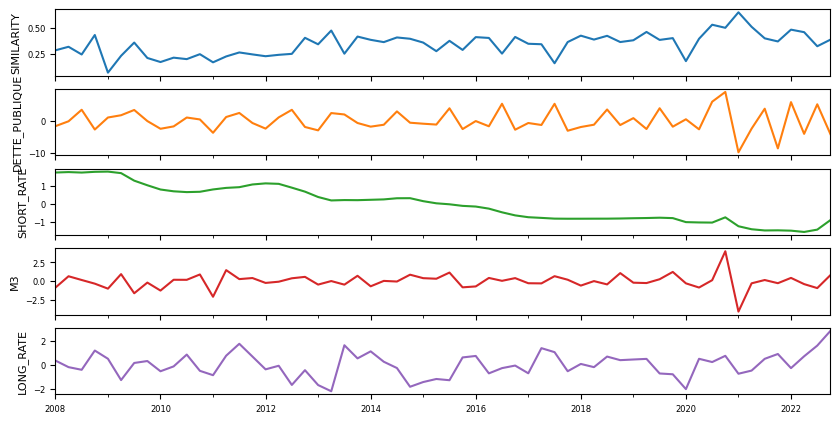

In [ ]:
fig,ax = plt.subplots(5, figsize=(10,5), sharex=True)
plot_cols = ['SIMILARITY', 'DETTE_PUBLIQUE', 'SHORT_RATE', 'M3', 'LONG_RATE']
new_df_norm[plot_cols].plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)):
    ax[a].set_ylabel(plot_cols[a], fontsize=8)
    ax[a].tick_params(axis='both', which='major', labelsize=6)
ax[-1].set_xlabel('')
plt.show();

## Define order

In [ ]:
model_f = sm.tsa.VAR(new_df_norm[['SIMILARITY', 'M3', 'SHORT_RATE', 'LONG_RATE', 'DETTE_PUBLIQUE']], freq='Q')
sorted_order = model_f.select_order()
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -2.948      -2.758     0.05247      -2.875
1      -7.518      -6.382   0.0005460      -7.084
2      -7.283      -5.200   0.0007110      -6.487
3      -7.708      -4.677   0.0005014      -6.550
4      -7.683      -3.706   0.0005969      -6.164
5      -7.231      -2.307    0.001226      -5.349
6      -8.317      -2.445   0.0006490      -6.073
7      -9.378      -2.560   0.0004771      -6.773
8      -11.18      -3.417   0.0002958      -8.215
9     -17.86*     -9.144*  5.846e-06*     -14.53*
-------------------------------------------------


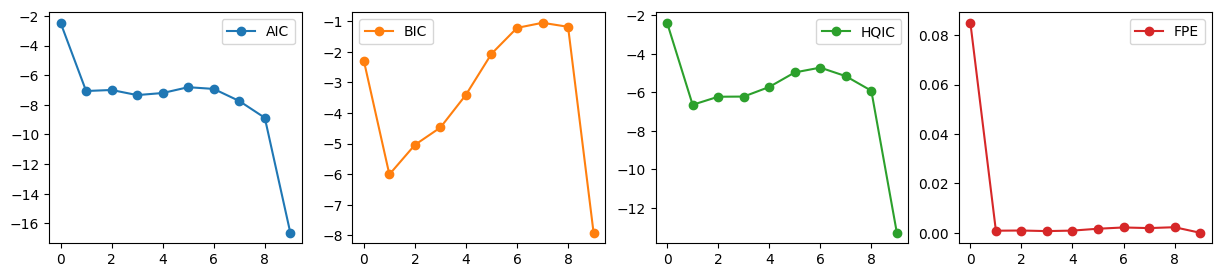

In [ ]:
aic, bic, fpe, hqic = [], [], [], []
model_f = sm.tsa.VAR(new_df_norm[['SIMILARITY', 'M1', 'SHORT_RATE', 'LONG_RATE', 'DETTE_PUBLIQUE']], freq='Q')
p = np.arange(0,10)
for i in p:
    result = model_f.fit(i)
    aic.append(result.aic)
    bic.append(result.bic)
    fpe.append(result.fpe)
    hqic.append(result.hqic)
lags_metrics_df = pd.DataFrame({'AIC': aic,
                                'BIC': bic,
                                'HQIC': hqic,
                                'FPE': fpe},
                               index=p)
fig, ax = plt.subplots(1, 4, figsize=(15, 3), sharex=True)
lags_metrics_df.plot(subplots=True, ax=ax, marker='o')
plt.show();

## Fit model

Now that we have the lag order, we can specify our model as follows:

$$
\text{VAR}(9) \text{:}
$$

$$
\text{Similarity}_t = \phi_{0,1} + \phi_{1,1}\text{Similarity}_{t-1} + \phi_{2,1}\text{Long rate}_{t-1} + \phi_{3,1}\text{Short rate}_{t-1} + \phi_{4,1}\text{Public Debt}_{t-1} + \phi_{5,1}\text{M3}_{t-1} +
$$

$$
\phi_{1,2}\text{Similarity}_{t-2} + \phi_{2,2}\text{Long rate}_{t-2} + \phi_{3,2}\text{Short rate}_{t-2} + \phi_{4,2}\text{Public Debt}_{t-2} + \phi_{5,2}\text{M3}_{t-2} +
$$

$$
\cdots \cdots \cdots
$$

$$
\phi_{1,9}\text{Similarity}_{t-9} + \phi_{2,9}\text{Long rate}_{t-9} + \phi_{3,9}\text{Short rate}_{t-9} + \phi_{4,9}\text{Public Debt}_{t-9} + \phi_{5,9}\text{M3}_{t-9} +
$$

$$
\epsilon_t
$$

In [ ]:
results_f = model_f.fit(maxlags=9, ic='aic', trend= 'n')
print(results_f.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 16, Jun, 2023
Time:                     09:33:56
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -5.93225
Nobs:                     51.0000    HQIC:                  -11.1982
Log likelihood:           231.773    FPE:                8.14441e-05
AIC:                     -14.4550    Det(Omega_mle):     3.44631e-06
--------------------------------------------------------------------
Results for equation SIMILARITY
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
L1.SIMILARITY             0.004793         0.216414            0.022           0.982
L1.M3                    -0.050279         0.037994           -1.323           0.186
L1.SHORT_RATE             0.308717     

In [ ]:
results_f.p_values

## Critical value for t-stat

In [ ]:
from scipy.stats import t
# Critical value
df = 52 - 5
alpha = 0.05

critical_value = t.ppf(1 - alpha/2, df)
critical_value

2.0117405104757546

## Goodness of fit

In [ ]:
# Get the residuals from the VARResults object
residuals_f = results_f.resid

# Calculate the sum of squared residuals (SSR)
ssr = np.sum(residuals_f ** 2, axis=0)

# Calculate the total sum of squares (TSS)
tss = np.sum((new_df_norm - np.mean(new_df_norm, axis=0)) ** 2, axis=0)

nobs = residuals_f.shape[0]
k = residuals_f.shape[1]

# Calculate the R-squared (R2)
r_squared = 1 - ssr / tss

# Calculate the adjusted R-squared (adjusted R2)
adjusted_r_squared = 1 - (1 - r_squared) * (nobs - 1) / (nobs - k - 1)

for i, var_name in enumerate(new_df_norm.columns):
    print(f"{var_name}: R2 = {r_squared[i]:.4f}, Adjusted R2 = {adjusted_r_squared[i]:.4f}")

SIMILARITY: R2 = 0.9408, Adjusted R2 = 0.9343
DETTE_PUBLIQUE: R2 = 0.9051, Adjusted R2 = 0.8945
M3: R2 = 0.9790, Adjusted R2 = 0.9767
LONG_RATE: R2 = 0.9992, Adjusted R2 = 0.9991
SHORT_RATE: R2 = 0.9661, Adjusted R2 = 0.9624


## Autocorrelation

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson


dw_statistic = durbin_watson(residuals_f.values)

lag = 9

dw_statistic = durbin_watson(residuals_f.values)

# Perform the Ljung-Box test for each equation
lb_statistic, lb_p_values = np.zeros(residuals_f.shape[1]), np.zeros(residuals_f.shape[1])
for i in range(residuals_f.shape[1]):
    lb_stat, lb_p_value = acorr_ljungbox(residuals_f.iloc[:, i].values, lags=lag, return_df=False)
    lb_statistic[i] = lb_stat[-1]  # Test statistic for specified lag
    lb_p_values[i] = lb_p_value[-1]  # p-value for specified lag

# Print the Durbin-Watson statistic and Ljung-Box test results
for i, var_name in enumerate(residuals_f.columns):
    print(f"{var_name}:")
    print(f"Durbin-Watson statistic: {dw_statistic[i]:.4f}")
    print(f"Ljung-Box test {lag} - Test statistic: {lb_statistic[i]:.4f}, p-value: {lb_p_values[i]:.4f}\n")

    if lb_p_values[i] > 0.05:
        print(f"We do not have enough evidence to reject the null hypothesis of no autocorrelation.")
        print(f"There is no significant autocorrelation in the residuals at lag {lag}.")
    else:
        print(f"The null hypothesis of no autocorrelation is rejected.")
        print(f"There is significant autocorrelation in the residuals at lag {lag}.")

    print()

SIMILARITY:
Durbin-Watson statistic: 1.7041
Ljung-Box test 9 - Test statistic: 8.1127, p-value: 0.5228

We do not have enough evidence to reject the null hypothesis of no autocorrelation.
There is no significant autocorrelation in the residuals at lag 9.

M3:
Durbin-Watson statistic: 1.9659
Ljung-Box test 9 - Test statistic: 7.3904, p-value: 0.5965

We do not have enough evidence to reject the null hypothesis of no autocorrelation.
There is no significant autocorrelation in the residuals at lag 9.

SHORT_RATE:
Durbin-Watson statistic: 1.7514
Ljung-Box test 9 - Test statistic: 7.1534, p-value: 0.6212

We do not have enough evidence to reject the null hypothesis of no autocorrelation.
There is no significant autocorrelation in the residuals at lag 9.

LONG_RATE:
Durbin-Watson statistic: 1.7327
Ljung-Box test 9 - Test statistic: 8.3187, p-value: 0.5024

We do not have enough evidence to reject the null hypothesis of no autocorrelation.
There is no significant autocorrelation in the residu

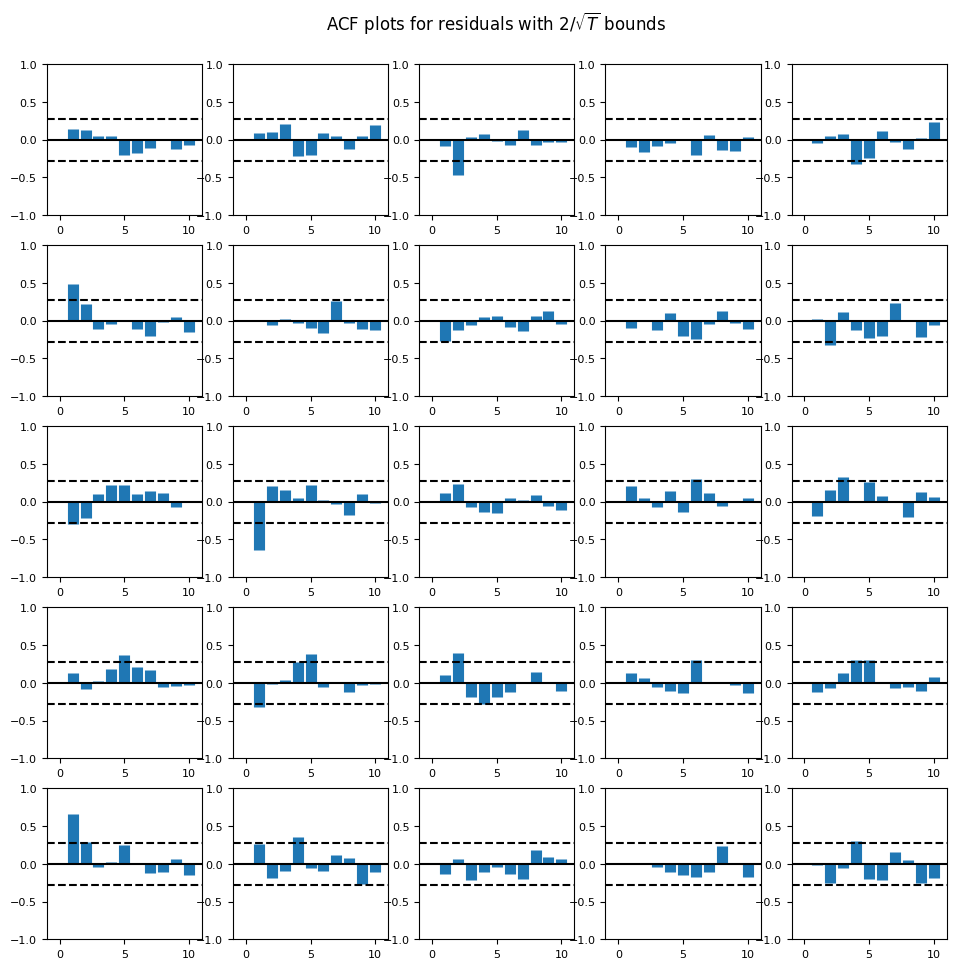

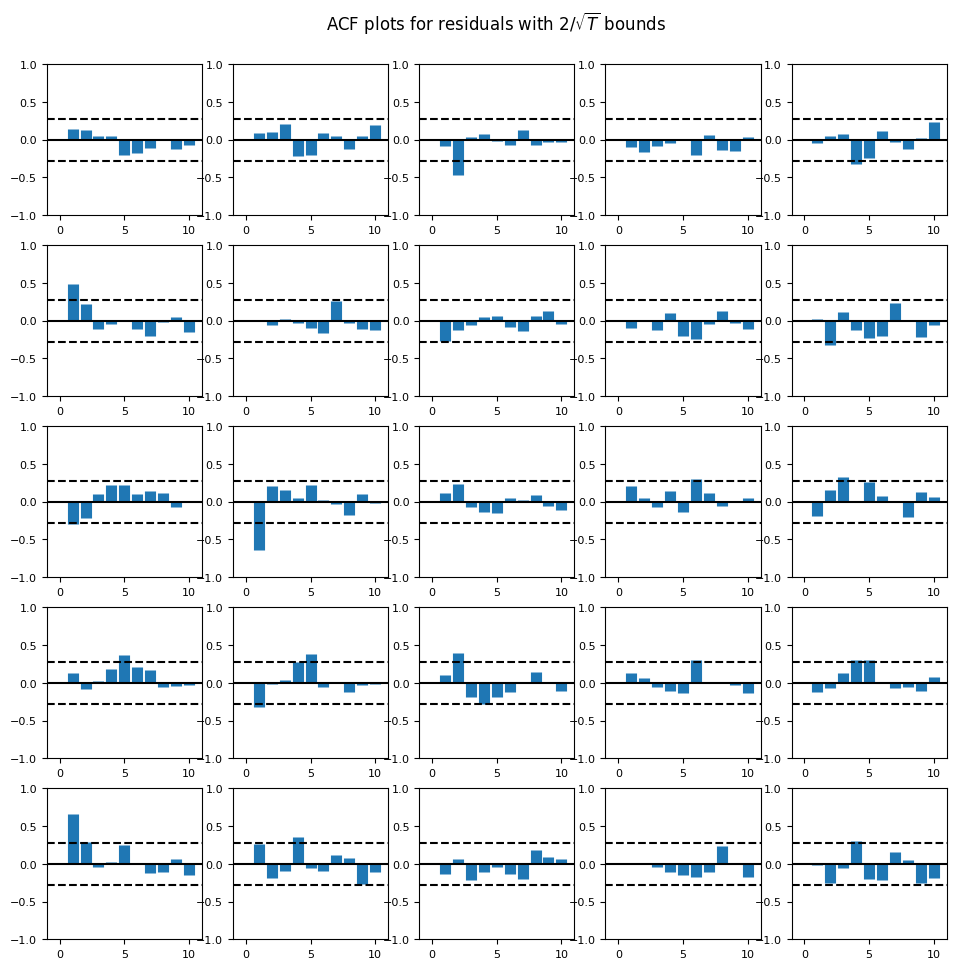

In [ ]:
results_f.plot_acorr()

## Normality

In [ ]:
normality_f = results_f.test_normality(signif=0.05)
print(normality_f)

<statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults object. H_0: data generated by normally-distributed process: fail to reject at 5% significance level. Test statistic: 7.614, critical value: 18.307>, p-value: 0.666>


Good, there is not enough evidence to conclude that the data significantly deviates from a normally distributed process.

## Heteroskedasticity

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

squared_residuals = residuals_f**2

# Step 2: Regress squared residuals on lagged values of variables
lagged_vars = sm.add_constant(results_f.endog)  # Include constant term and endogenous variables
lagged_vars = lagged_vars[:-results_f.k_ar, :]  # Remove the last rows to align with squared residuals

# Fit the regression model
reg_model = sm.OLS(squared_residuals, lagged_vars)
reg_results = reg_model.fit()

# Step 3: Perform chi-square test on the coefficients
n_lags = results_f.k_ar  # Number of lags in the VAR model
n_vars = results_f.endog.shape[1]  # Number of endogenous variables
n_obs = len(residuals_f)  # Number of observations

# Extract the NumPy array from the DataFrame and reshape it
squared_residuals_array = squared_residuals.to_numpy()
squared_residuals_reshaped = squared_residuals_array.reshape(-1, n_vars)

test_statistics = []
p_values = []
for i in range(n_vars):
    test_statistic = n_obs * np.dot(squared_residuals_reshaped[:, i], squared_residuals_reshaped[:, i])
    p_value = 1 - stats.chi2.cdf(test_statistic, df=n_lags)
    test_statistics.append(test_statistic)
    p_values.append(p_value)

# Print the test results for each variable
print("Breusch-Pagan Test Results:")
for i in range(n_vars):
    variable_name = ['SIMILARITY', 'M3', 'SHORT_RATE', 'LONG_RATE', 'DETTE_PUBLIQUE'][i]
    print(f"Variable: {variable_name}")
    print("Test Statistic: ", test_statistics[i])
    print("p-value: ", p_values[i])
    print()

Breusch-Pagan Test Results:
Variable: SIMILARITY
Test Statistic:  0.0017219190855152664
p-value:  0.9999999999999997

Variable: M3
Test Statistic:  4.201099250668156
p-value:  0.8976849275049701

Variable: SHORT_RATE
Test Statistic:  0.006466906603225361
p-value:  0.9999999999998815

Variable: LONG_RATE
Test Statistic:  80.26757997937739
p-value:  1.4299672557172016e-13

Variable: DETTE_PUBLIQUE
Test Statistic:  3520.324287408807
p-value:  0.0



We can accept the null hypothesis for the variable "SIMILARITY" and conclude that there is no significant conditional heteroscedasticity in the residuals of the VAR model for this variable.

## Impulse Response Analysis

In [ ]:
irf_f = results_f.irf(9)

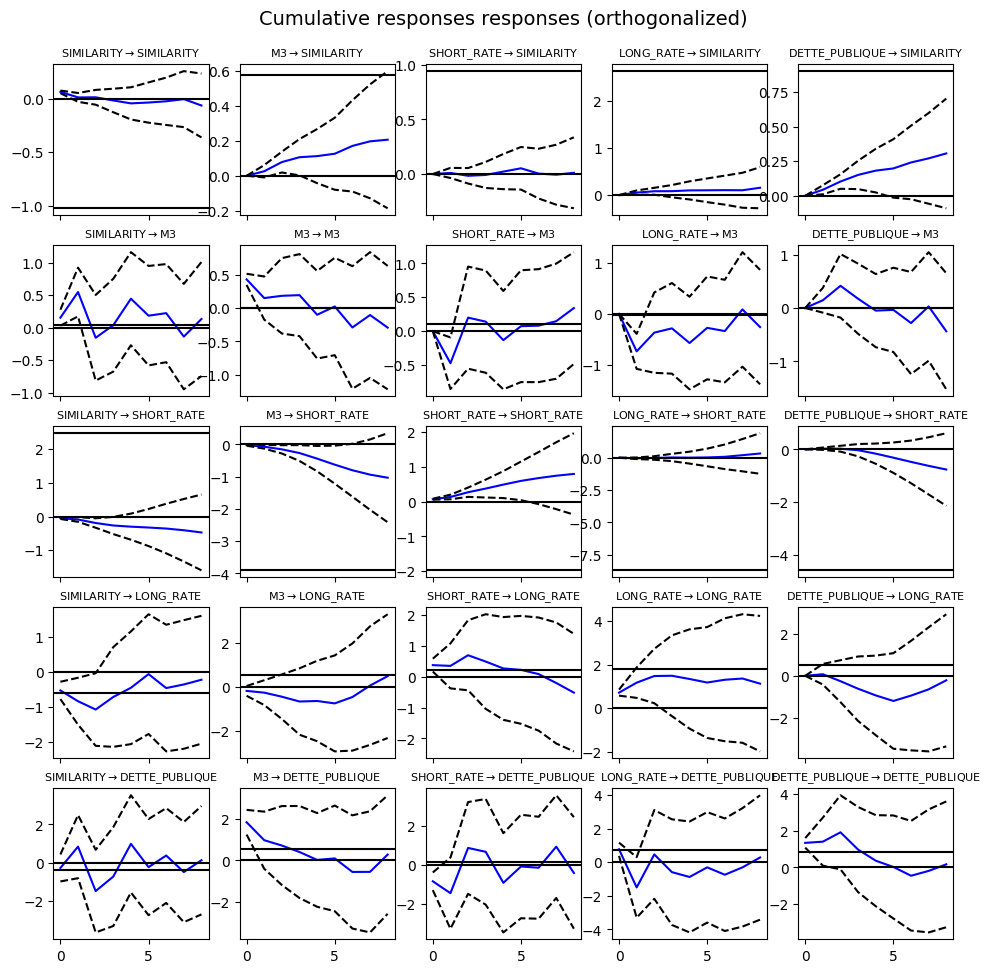

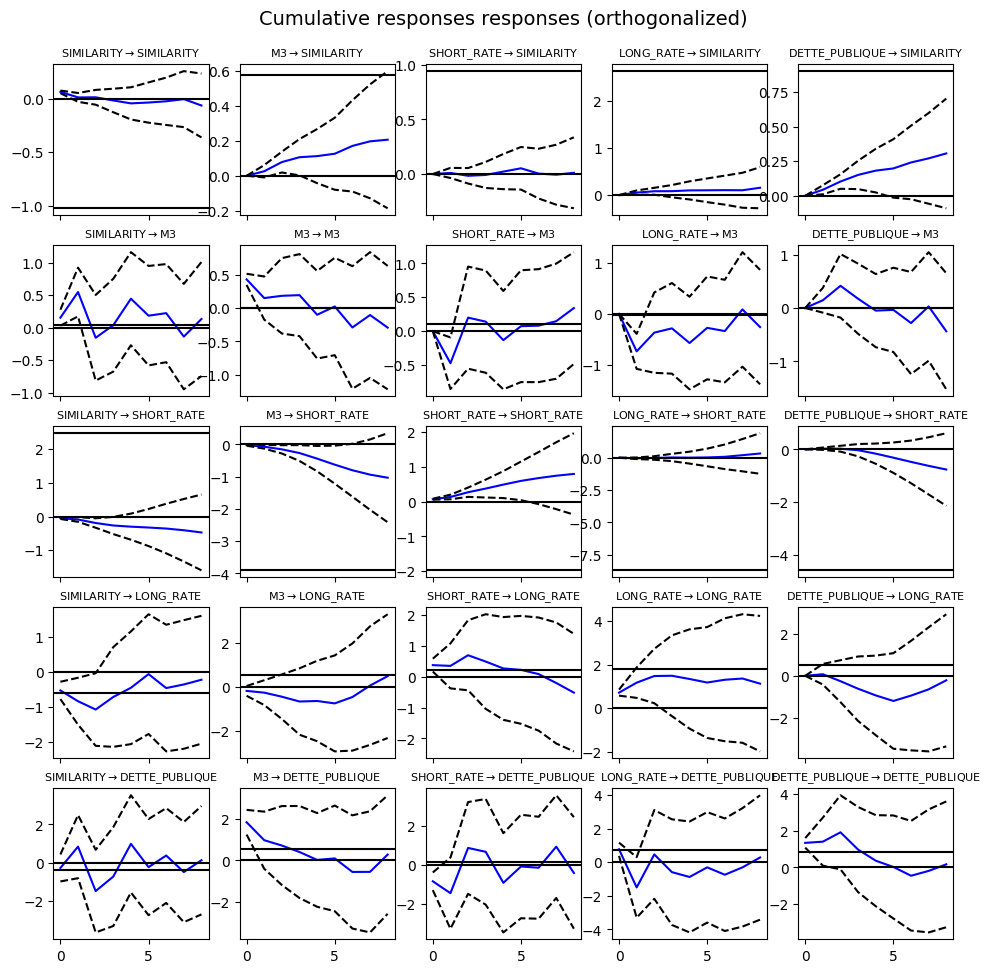

In [ ]:
irf_f.plot_cum_effects(orth=True, subplot_params={'fontsize':8})

The positive values for M3 and the debt/gdp ratios suggest that the shock for those variables leads to a cumulative increase in 'SIMILARITY' in the long run.

## Forecast Error Variance Decomposition

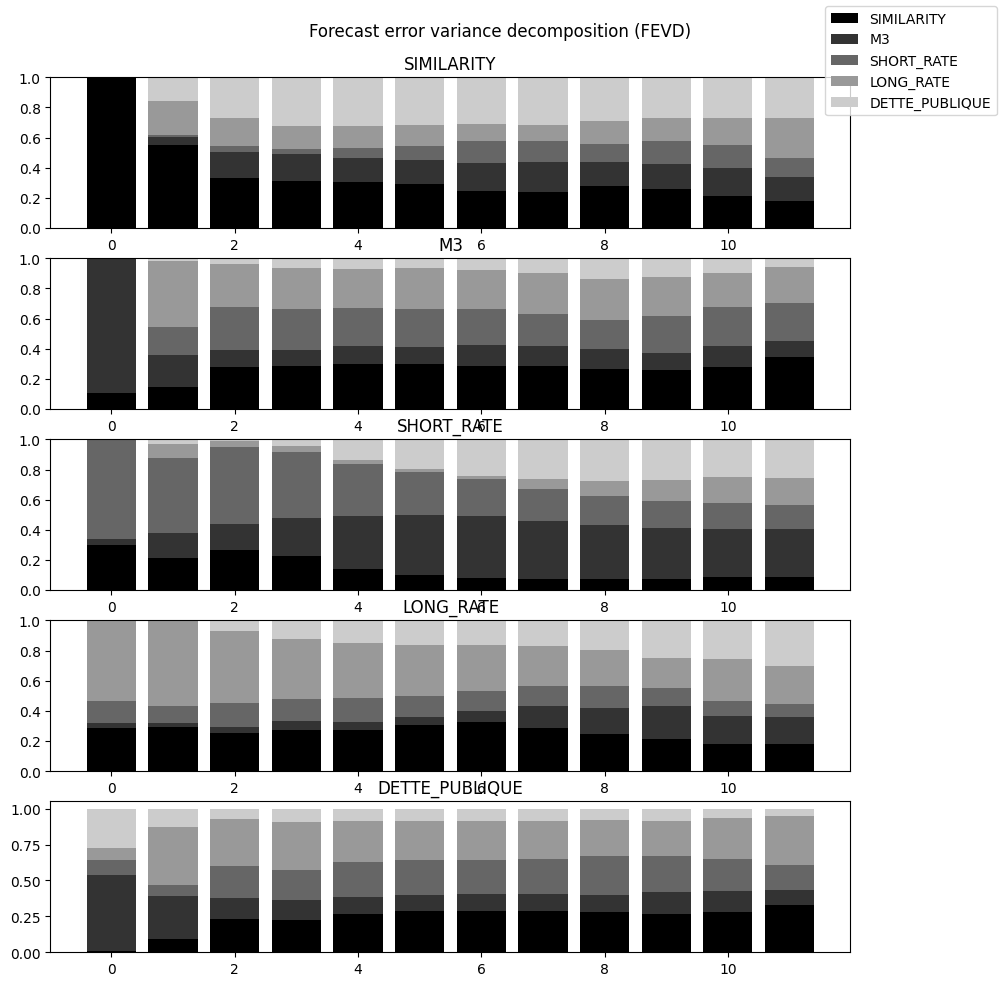

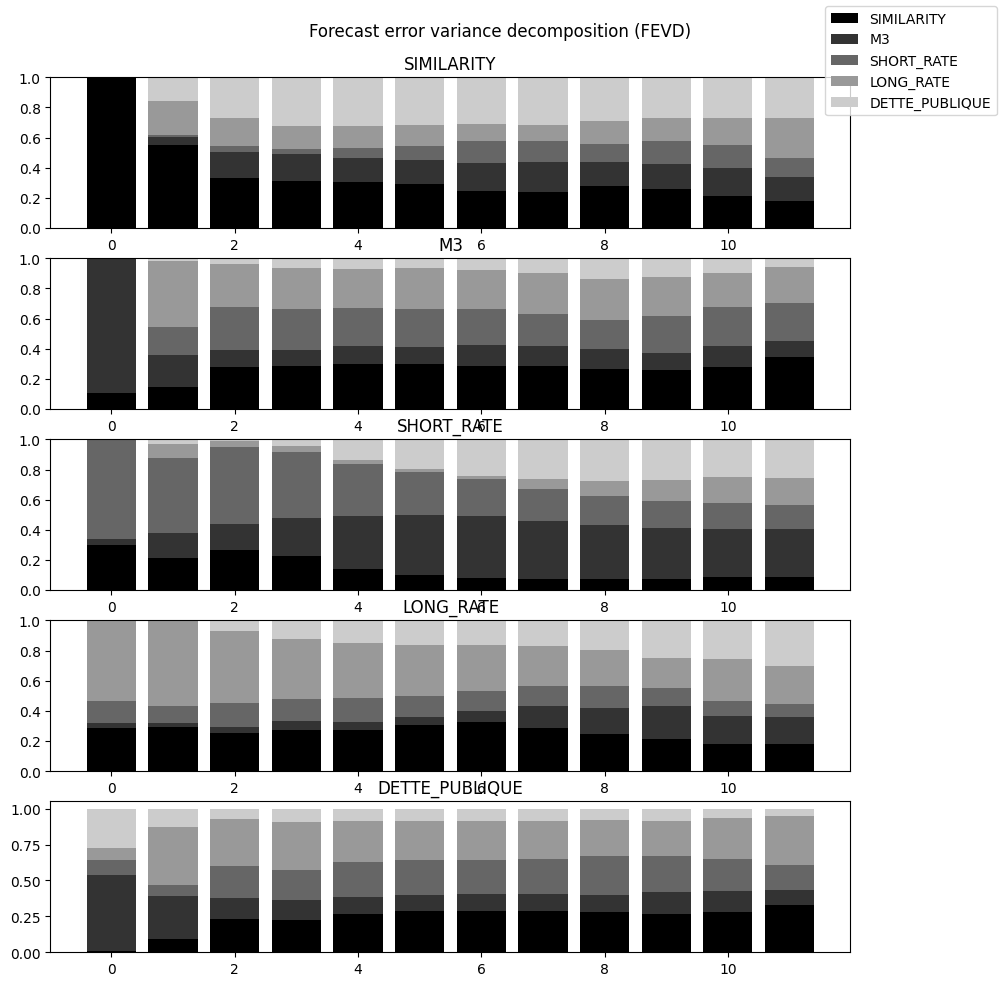

In [ ]:
variance_dec = results_f.fevd(12)
variance_dec.plot()

# VAR(p) (Germany)

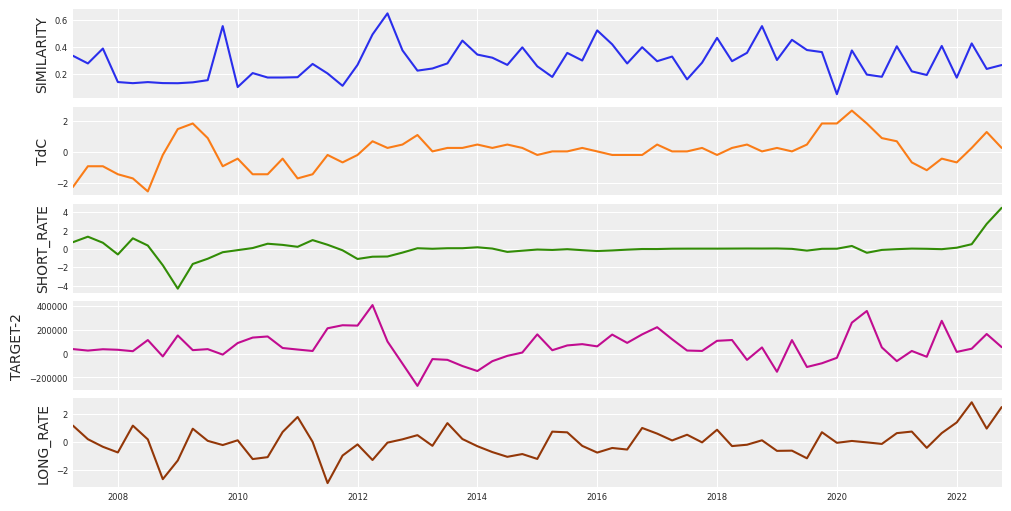

In [ ]:
fig,ax = plt.subplots(5, figsize=(10,5), sharex=True)
plot_cols = ['SIMILARITY', 'TdC', 'SHORT_RATE', 'TARGET-2', 'LONG_RATE']
new_df_norm_g[plot_cols].plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)):
    ax[a].set_ylabel(plot_cols[a], fontsize=10)
    ax[a].tick_params(axis='both', which='major', labelsize=6)
ax[-1].set_xlabel('')
plt.show();

## Define order

In [ ]:
model_g = sm.tsa.VAR(new_df_norm_g[['SIMILARITY', 'TdC', 'TARGET-2', 'SHORT_RATE', 'LONG_RATE']], freq='Q')
sorted_order_g = model_g.select_order()
print(sorted_order_g.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       18.41       18.59   9.861e+07       18.48
1       16.79      17.89*   1.960e+07       17.21
2       16.78       18.81   1.998e+07       17.56
3       17.14       20.09   3.041e+07       18.28
4       16.80       20.67   2.465e+07       18.30
5       16.53       21.32   2.339e+07       18.38
6       16.62       22.33   3.648e+07       18.82
7       15.95       22.58   3.347e+07       18.50
8       13.63       21.18   8.715e+06       16.54
9      11.70*       20.17  7.349e+06*      14.97*
-------------------------------------------------


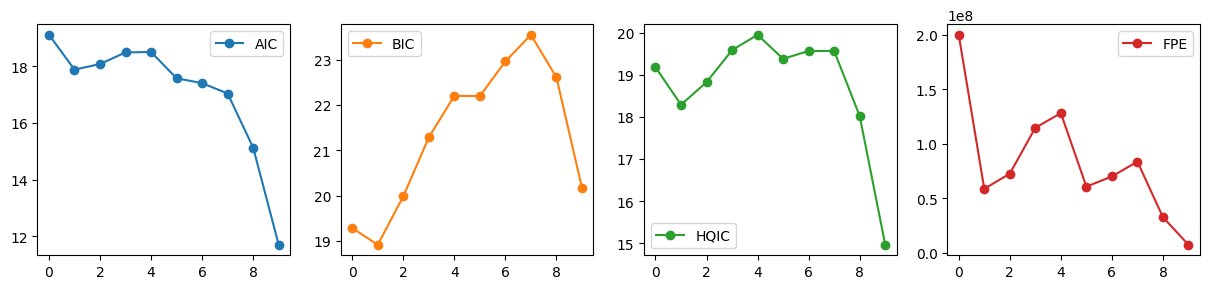

In [ ]:
aic, bic, fpe, hqic = [], [], [], []
model_g = sm.tsa.VAR(new_df_norm_g[['SIMILARITY', 'TdC', 'TARGET-2', 'SHORT_RATE', 'LONG_RATE']], freq='Q')
p = np.arange(0,10)
for i in p:
    result = model_g.fit(i)
    aic.append(result.aic)
    bic.append(result.bic)
    fpe.append(result.fpe)
    hqic.append(result.hqic)
lags_metrics_df = pd.DataFrame({'AIC': aic,
                                'BIC': bic,
                                'HQIC': hqic,
                                'FPE': fpe},
                               index=p)
fig, ax = plt.subplots(1, 4, figsize=(15, 3), sharex=True)
lags_metrics_df.plot(subplots=True, ax=ax, marker='o')
plt.show();

## Fit Model

Now that we have the lag order, we can specify our model as follows:

$$
\text{VAR}(9) \text{:}
$$

$$
\text{Similarity}_t = \phi_{0,1} + \phi_{1,1}\text{Similarity}_{t-1} + \phi_{2,1}\text{Long rate}_{t-1} + \phi_{3,1}\text{Short rate}_{t-1} + \phi_{4,1}\text{Target-2}_{t-1} + \phi_{5,1}\text{Unemp}_{t-1} +
$$

$$
\phi_{1,2}\text{Similarity}_{t-2} + \phi_{2,2}\text{Long rate}_{t-2} + \phi_{3,2}\text{Short rate}_{t-2} + \phi_{4,2}\text{Target-2}_{t-2} + \phi_{5,2}\text{Unemp}_{t-2} +
$$

$$
\cdots \cdots \cdots
$$

$$
\phi_{1,9}\text{Similarity}_{t-9} + \phi_{2,9}\text{Long rate}_{t-9} + \phi_{3,9}\text{Short rate}_{t-9} + \phi_{4,9}\text{Target-2}_{t-9} + \phi_{5,9}\text{Unemp}_{t-9} +
$$

$$
\epsilon_t
$$

In [ ]:
results_g = model_g.fit(ic='aic', trend= 'n')
print(results_g.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 16, Jun, 2023
Time:                     10:30:23
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    20.9425
Nobs:                     54.0000    HQIC:                   15.8512
Log likelihood:          -499.799    FPE:                1.21298e+07
AIC:                      12.6550    Det(Omega_mle):         585660.
--------------------------------------------------------------------
Results for equation SIMILARITY
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
L1.SIMILARITY         0.256852         0.216808            1.185           0.236
L1.TdC               -0.103311         0.064855           -1.593           0.111
L1.TARGET-2          -0.000000         0.000000        

## Goodness of Fit

In [ ]:
# Get the residuals from the VARResults object
residuals_g = results_g.resid

# Calculate the sum of squared residuals (SSR)
ssr = np.sum(residuals_g ** 2, axis=0)

# Calculate the total sum of squares (TSS)
tss = np.sum((new_df_norm_g - np.mean(new_df_norm_g, axis=0)) ** 2, axis=0)

nobs = residuals_g.shape[0]
k = residuals_g.shape[1]

# Calculate the R-squared (R2)
r_squared = 1 - ssr / tss

# Calculate the adjusted R-squared (adjusted R2)
adjusted_r_squared = 1 - (1 - r_squared) * (nobs - 1) / (nobs - k - 1)

for i, var_name in enumerate(new_df_norm_g.columns):
    print(f"{var_name}: R2 = {r_squared[i]:.4f}, Adjusted R2 = {adjusted_r_squared[i]:.4f}")

SIMILARITY: R2 = 0.9415, Adjusted R2 = 0.9355
TARGET-2: R2 = 0.9766, Adjusted R2 = 0.9742
TdC: R2 = 0.8917, Adjusted R2 = 0.8804
LONG_RATE: R2 = 0.7792, Adjusted R2 = 0.7562
SHORT_RATE: R2 = 0.9749, Adjusted R2 = 0.9723


## Autocorrelation

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson

dw_statistic = durbin_watson(residuals_g.values)

lag = 5

dw_statistic = durbin_watson(residuals_g.values)

# Perform the Ljung-Box test for each equation
lb_statistic, lb_p_values = np.zeros(residuals_g.shape[1]), np.zeros(residuals_g.shape[1])
for i in range(residuals_g.shape[1]):
    lb_stat, lb_p_value = acorr_ljungbox(residuals_g.iloc[:, i].values, lags=lag, return_df=False)
    lb_statistic[i] = lb_stat[-1]  # Test statistic for specified lag
    lb_p_values[i] = lb_p_value[-1]  # p-value for specified lag

# Print the Durbin-Watson statistic and Ljung-Box test results
for i, var_name in enumerate(residuals_g.columns):
    print(f"{var_name}:")
    print(f"Durbin-Watson statistic: {dw_statistic[i]:.4f}")
    print(f"Ljung-Box test {lag} - Test statistic: {lb_statistic[i]:.4f}, p-value: {lb_p_values[i]:.4f}\n")

    if lb_p_values[i] > 0.05:
        print(f"We do not have enough evidence to reject the null hypothesis of no autocorrelation.")
        print(f"There is no significant autocorrelation in the residuals at lag {lag}.")
    else:
        print(f"The null hypothesis of no autocorrelation is rejected.")
        print(f"There is significant autocorrelation in the residuals at lag {lag}.")

    print()

SIMILARITY:
Durbin-Watson statistic: 2.3148
Ljung-Box test 5 - Test statistic: 4.7837, p-value: 0.4428

We do not have enough evidence to reject the null hypothesis of no autocorrelation.
There is no significant autocorrelation in the residuals at lag 5.

TdC:
Durbin-Watson statistic: 2.9508
Ljung-Box test 5 - Test statistic: 25.0733, p-value: 0.0001

The null hypothesis of no autocorrelation is rejected.
There is significant autocorrelation in the residuals at lag 5.

TARGET-2:
Durbin-Watson statistic: 2.1021
Ljung-Box test 5 - Test statistic: 5.7757, p-value: 0.3287

We do not have enough evidence to reject the null hypothesis of no autocorrelation.
There is no significant autocorrelation in the residuals at lag 5.

SHORT_RATE:
Durbin-Watson statistic: 2.2725
Ljung-Box test 5 - Test statistic: 7.4801, p-value: 0.1873

We do not have enough evidence to reject the null hypothesis of no autocorrelation.
There is no significant autocorrelation in the residuals at lag 5.

LONG_RATE:
Durbi

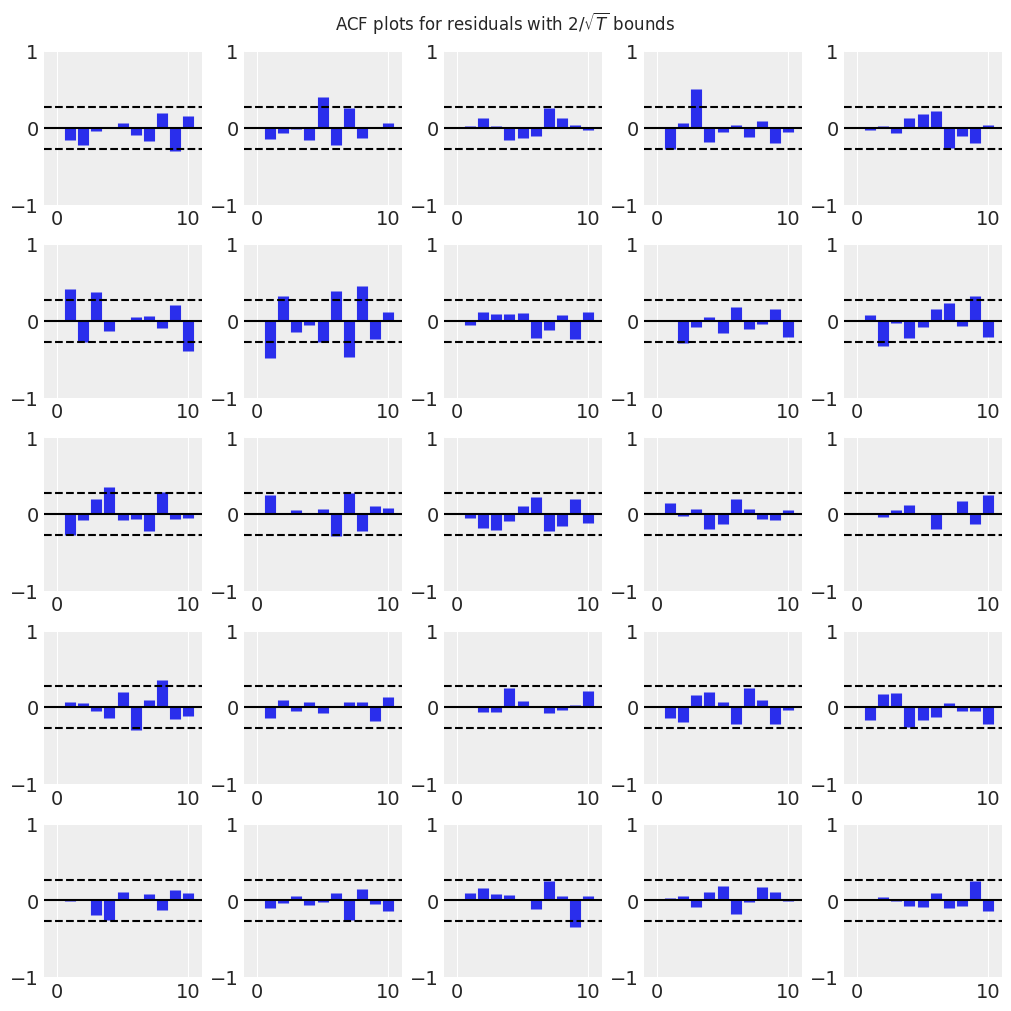

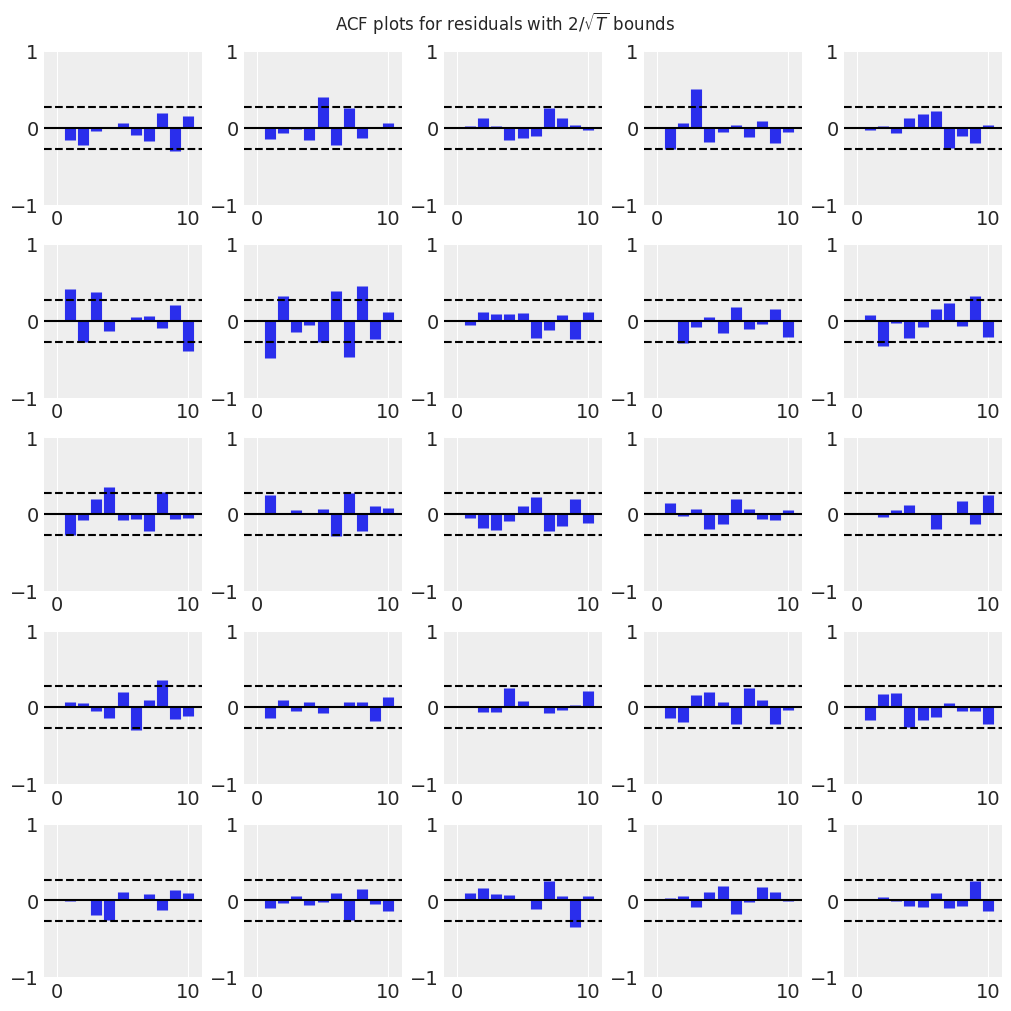

In [ ]:
results_g.plot_acorr()

## Normality

In [ ]:
normality = results_g.test_normality(signif=0.05)
print(normality)

<statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults object. H_0: data generated by normally-distributed process: fail to reject at 5% significance level. Test statistic: 15.297, critical value: 18.307>, p-value: 0.122>


Good, there is not enough evidence to conclude that the data significantly deviates from a normally distributed process.

## Heteroskedasticity


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

squared_residuals_g = residuals_g**2

# Step 2: Regress squared residuals on lagged values of variables
lagged_vars = sm.add_constant(results_g.endog)  # Include constant term and endogenous variables
lagged_vars = lagged_vars[:-results_g.k_ar, :]  # Remove the last rows to align with squared residuals

# Fit the regression model
reg_model = sm.OLS(squared_residuals_g, lagged_vars)
reg_results = reg_model.fit()

# Step 3: Perform chi-square test on the coefficients
n_lags = results_g.k_ar  # Number of lags in the VAR model
n_vars = results_g.endog.shape[1]  # Number of endogenous variables
n_obs = len(residuals_g)  # Number of observations

# Extract the NumPy array from the DataFrame and reshape it
squared_residuals_array = squared_residuals_g.to_numpy()
squared_residuals_reshaped = squared_residuals_array.reshape(-1, n_vars)

test_statistics = []
p_values = []
for i in range(n_vars):
    test_statistic = n_obs * np.dot(squared_residuals_reshaped[:, i], squared_residuals_reshaped[:, i])
    p_value = 1 - stats.chi2.cdf(test_statistic, df=n_lags)
    test_statistics.append(test_statistic)
    p_values.append(p_value)

# Print the test results for each variable
print("Breusch-Pagan Test Results:")
for i in range(n_vars):
    variable_name = ['SIMILARITY', 'M3', 'SHORT_RATE', 'LONG_RATE', 'DETTE_PUBLIQUE'][i]
    print(f"Variable: {variable_name}")
    print("Test Statistic: ", test_statistics[i])
    print("p-value: ", p_values[i])
    print()

Breusch-Pagan Test Results:
Variable: SIMILARITY
Test Statistic:  0.06504135889236955
p-value:  0.9999999962475828

Variable: M3
Test Statistic:  8.994088573702888
p-value:  0.43782004629428006

Variable: SHORT_RATE
Test Statistic:  9.593485968645457e+22
p-value:  0.0

Variable: LONG_RATE
Test Statistic:  7.704741532440521
p-value:  0.5641530640432963

Variable: DETTE_PUBLIQUE
Test Statistic:  32.26383112126573
p-value:  0.00017926046740979196



Since the p-value is very close to 1 (0.9999), it suggests strong evidence in favor of the null hypothesis. The null hypothesis in the Breusch-Pagan test is that there is no conditional heteroscedasticity, meaning that the variance of the residuals is constant across different values of the independent variables.

## Impulse Response Analysis

In [ ]:
irf_g = results_g.irf(9)

NameError: ignored

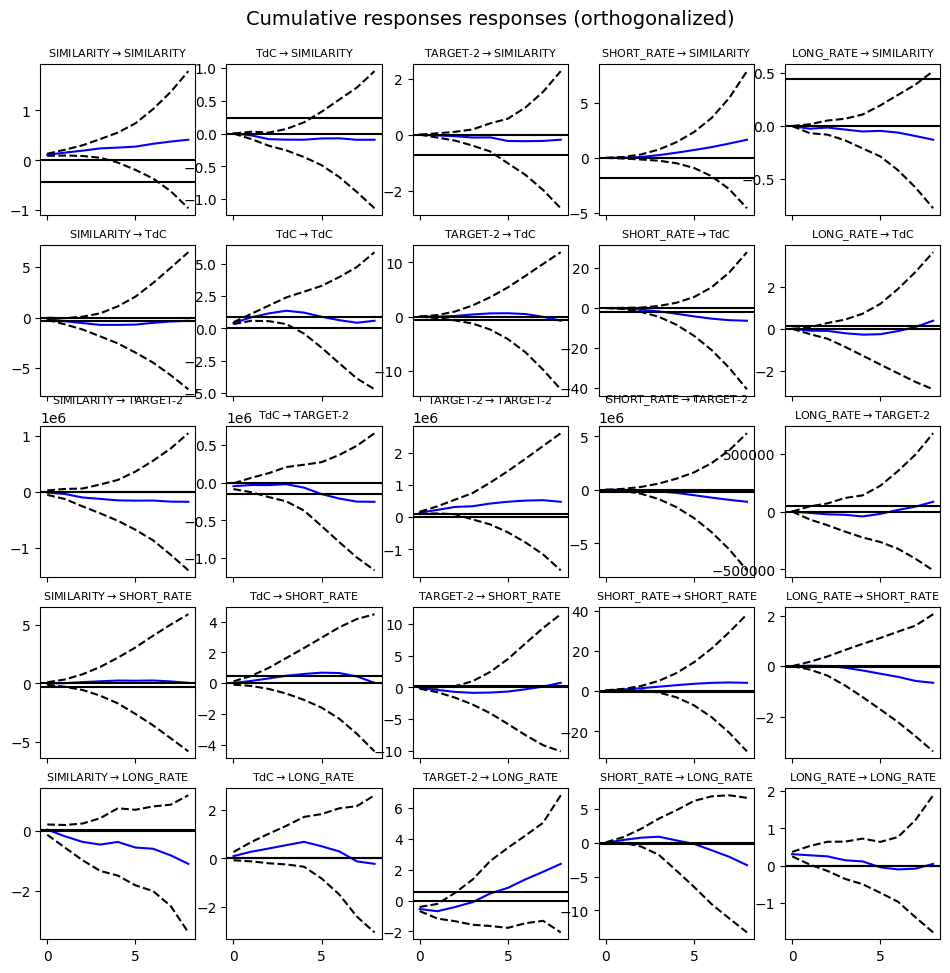

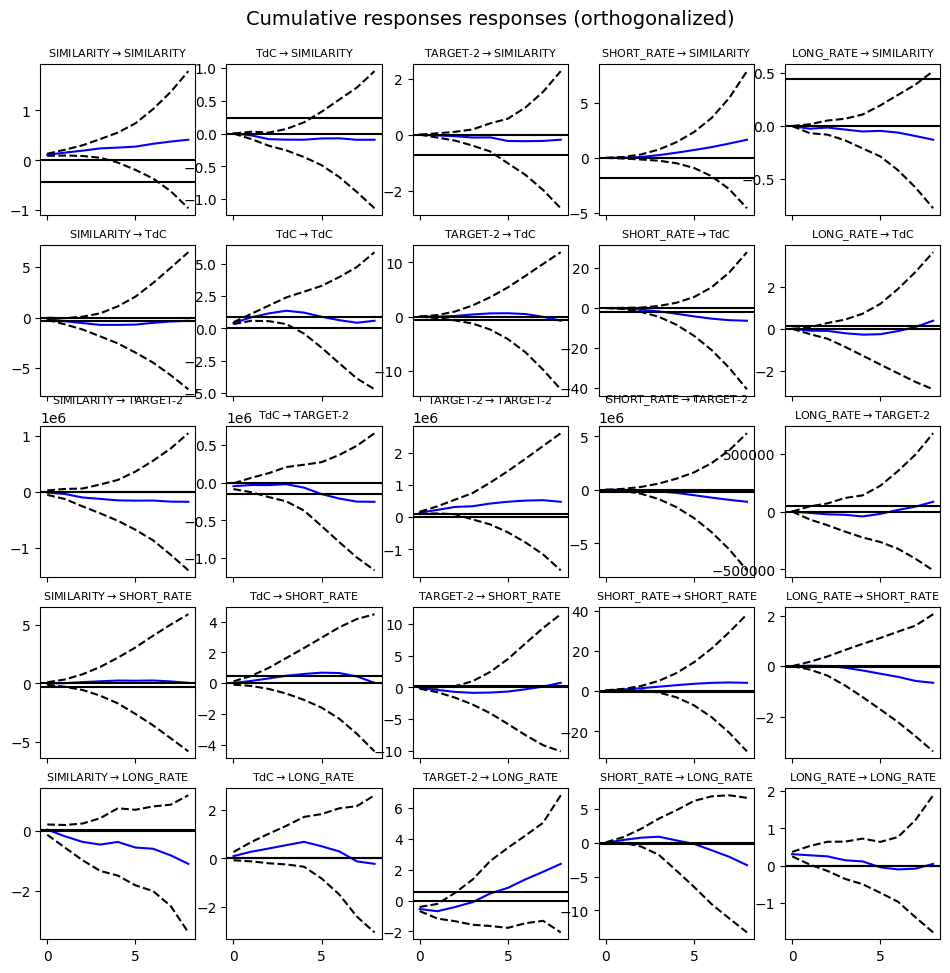

In [ ]:
irf_g.plot_cum_effects(orth=True, subplot_params={'fontsize':8})

## Forecast Error Variance Decomposition

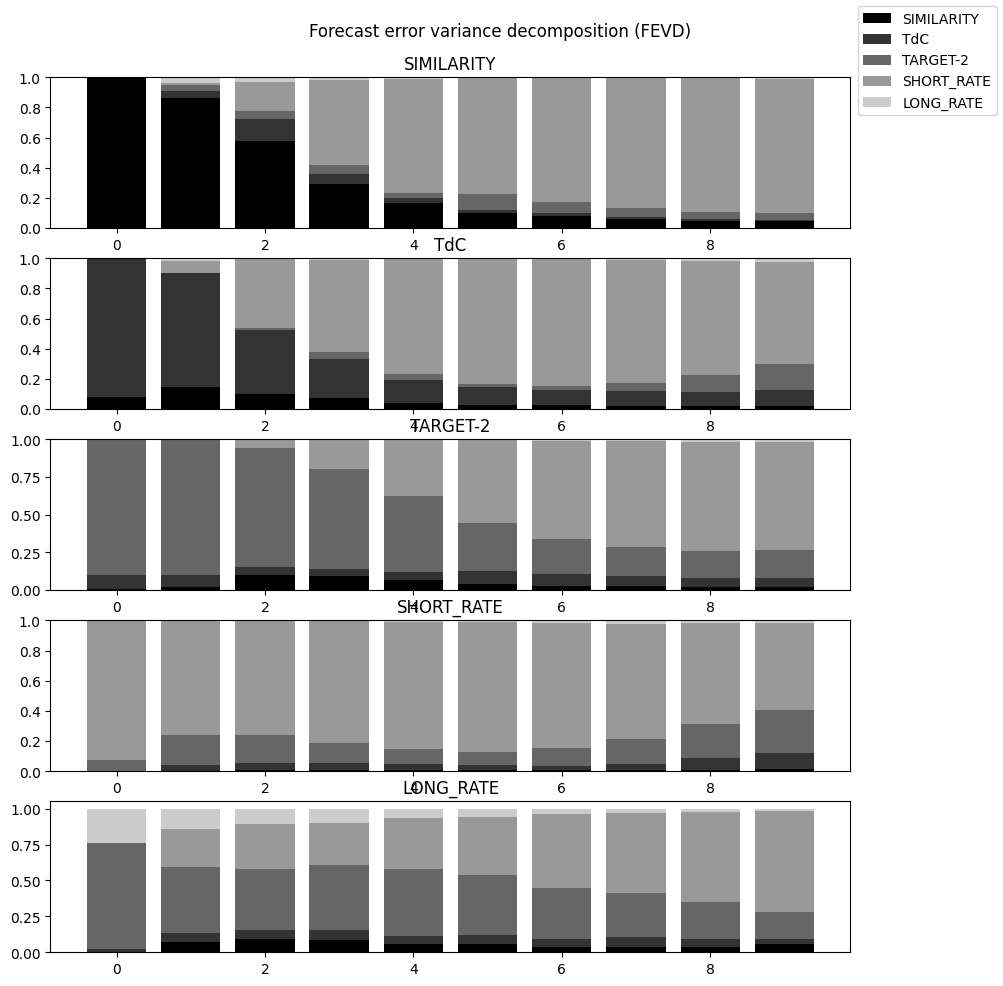

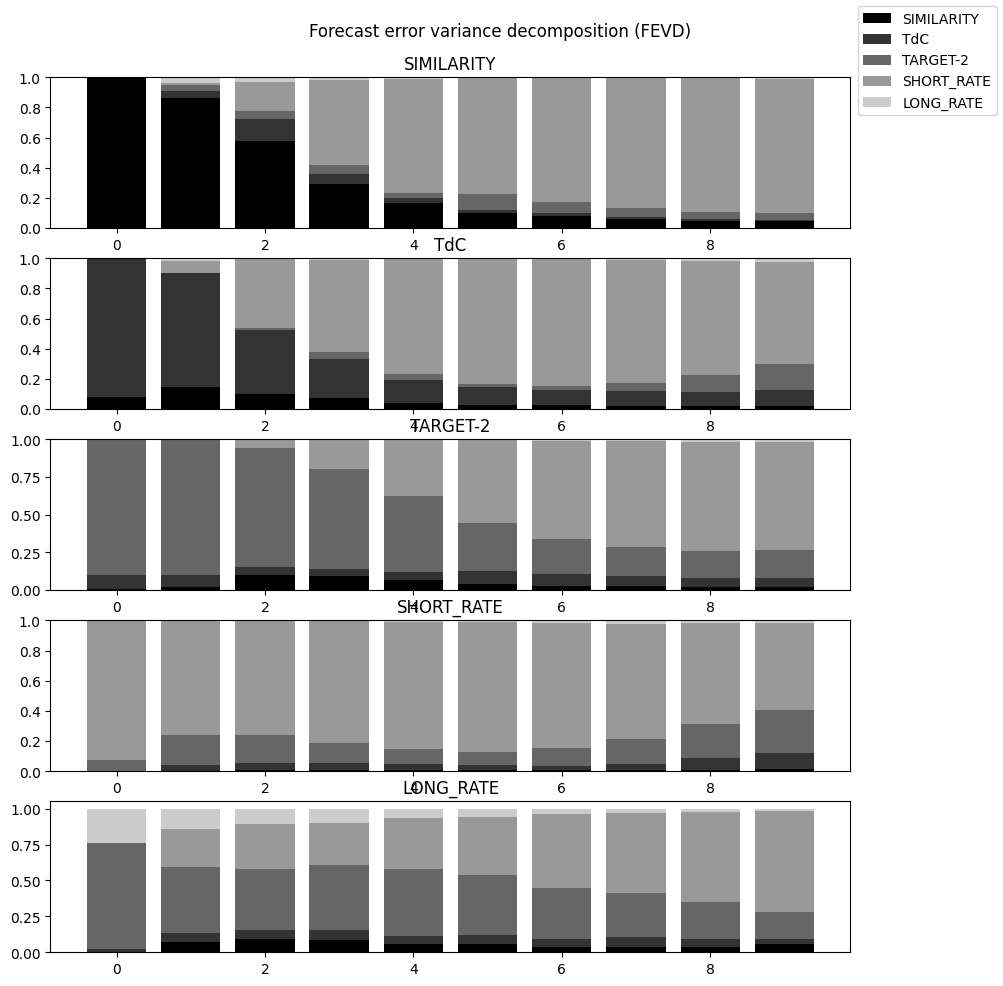

In [ ]:
variance_dec = results_g.fevd(10)
variance_dec.plot()

# Granger Causality

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
def granger_causation_matrix(data, variables, p, test = 'ssr_chi2test', verbose=False):
    """Check Granger Causality of all possible combinations of the time series.
    The rows are the response variables, columns are predictors. The values in the table
    are the P-Values. P-Values lesser than the significance level (0.05), implies
    the Null Hypothesis that the coefficients of the corresponding past values is
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], p, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(p)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

## France

In [ ]:
granger_causation_matrix(new_df_norm, new_df_norm.columns, 9)

,SIMILARITY_x,DETTE_PUBLIQUE_x,M3_x,LONG_RATE_x,SHORT_RATE_x
SIMILARITY_y,1.0000,0.0306,0.0424,0.5450,0.0006
DETTE_PUBLIQUE_y,0.0074,1.0000,0.0012,0.4813,0.0297
M3_y,0.0167,0.0004,1.0000,0.2187,0.1891
LONG_RATE_y,0.3396,0.0001,0.0007,1.0000,0.0137
SHORT_RATE_y,0.0974,0.0000,0.0000,0.0002,1.0000


The granger causality test shows that debt/gdp ratio, M3 and the short rate may be helpful in predicting the similarity score.

## Germany

In [ ]:
granger_causation_matrix(new_df_norm_g, new_df_norm_g.columns, 9)

,SIMILARITY_x,TARGET-2_x,TdC_x,LONG_RATE_x,SHORT_RATE_x
SIMILARITY_y,1.0000,0.1488,0.2358,0.0013,0.0211
TARGET-2_y,0.0042,1.0000,0.2468,0.3567,0.6535
TdC_y,0.0014,0.3231,1.0000,0.1141,0.0001
LONG_RATE_y,0.1796,0.0600,0.0515,1.0000,0.0364
SHORT_RATE_y,0.0138,0.0080,0.0000,0.0001,1.0000


The granger causality test shows that the long rate and the short rate may be helpful in predicting the similarity score.